In [1]:
from lxml import etree
import json
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline  
import seaborn as sns
import networkx as nx
import itertools
import matplotlib
import numpy as np


# Parsing 

In [2]:
def parse(file_path): 
    i = 0 
    tmp = ''
    key = ''
    xml2 =etree.iterparse(file_path, recover=True)
    data = []
    for action, elem in xml2:
        data.append((elem.attrib,elem.text))
    data_dict = {}
    l = set()
    for elem in data: 
        try : 
            tmp = key 
            key = elem[0].get('qualifier')
            if key == 'author':
                l.add(elem[1])
                data_dict[key] = l
                if tmp == key:
                    l.add(elem[1])
                    data_dict[key] = l
                else : 
                    l = set()
            else : 
                data_dict[key] = elem[1]
        except TypeError: 
                data_dict['None'] = elem[1]
    return data_dict


### Get all data 

In [18]:
import os
rootdir = '/Users/zhechensu/Desktop/Github/semester-project/papers-import'


In [20]:
all_data = {}
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        path = os.path.join(subdir, file)
        if 'dublin_core' in (path) : 
            num_doc = subdir.split('/')[-1]
            if num_doc in all_data.keys():
                #print(num_doc)
                all_data[num_doc+'_'] = parse(path)
            else : 
                all_data[num_doc] = parse(path)

In [21]:
columns = set()
for keys,items in all_data.items():
    for keys_in,items_in in items.items():
        columns.add(keys_in)

In [22]:
df_data = pd.DataFrame(index=all_data.keys(),columns=columns)

In [23]:
for ind in df_data.index:
    for column in columns: 
        try : 
            df_data.loc[ind,column] = all_data[ind][column]
        except KeyError:
            df_data.loc[ind,column] = ''

In [24]:
df_data['citation'].head()

440-447      Damşa, C. (2014). Shared Epistemic Agency and...
527-534      Feng, M., Roschelle, J., Murphy, R., & Heffern...
1117-1121    Loper, S., McNeill, K. L., Peck, R., Price, J....
394-401      Mor-Hagani, S. & Ben-Zvi, D. (2014). Computer-...
46-53        Forbes, C. T., Schwarz, C. V., & Zangori, L. (...
Name: citation, dtype: object

In [25]:
df_data.head()

author iso  \
440-447                                      {Damşa, Crina}  en   
527-534    {Heffernan, Neil T., Murphy, Robert, Roschelle...  en   
1117-1121  {Price, Jeremy, Peck, Raphaela, Barber, Jacque...  en   
394-401                                      {Ben-Zvi, Dani}  en   
46-53                {Zangori, Laura, Schwarz, Christina V.}  en   

                                                 uri   issued  \
440-447     https://doi.dx.org/10.22318/icls2014.440  2014-06   
527-534     https://doi.dx.org/10.22318/icls2014.527  2014-06   
1117-1121  https://doi.dx.org/10.22318/icls2014.1117  2014-06   
394-401     https://doi.dx.org/10.22318/icls2014.394  2014-06   
46-53        https://doi.dx.org/10.22318/icls2014.46  2014-06   

                    accessioned          none  \
440-447    2018-05-21T22:08:50Z  Book chapter   
527-534    2018-05-21T22:08:51Z  Book chapter   
1117-1121  2018-05-21T22:08:51Z  Book chapter   
394-401    2018-05-21T22:08:50Z  Book chapter   
46-53      2018-05-21T22:08:50Z  Book chapter   

                                                    citation  \
440-447    Damşa, C. (2014). Shared Epistemic Agency and...   
527-534    Feng, M., Roschelle, J., Murphy, R., & Heffern...   
1117-1121  Loper, S., McNeill, K. L., Peck, R., Price, J....   
394-401    Mor-Hagani, S. & Ben-Zvi, D. (2014). Computer-...   
46-53      Forbes, C. T., Schwarz, C. V., & Zangori, L. (...   

                                                    abstract     NaN  \
440-447    This paper aims to clarify the concept of shar...  \n       
527-534    The field of learning analytics is rapidly dev...  \n       
1117-1121  We report on work in progress from a research ...  \n       
394-401    Various studies on computer-supported collabor...  \n       
46-53      Elementary students should engage in the artic...  \n       

                      available  
440-447    2018-05-21T22:08:50Z  
527-534    2018-05-21T22:08:51Z  
1117-1121  2018-05-21T22:08:51Z  
394-401    2018-05-21T22:08:50Z  
46-53      2018-05-21T22:08:50Z

In [26]:
df_data.loc['46','citation']

'Viswanathan, S. A. & Vanlehn, K. (2017). High Accuracy Detection of Collaboration From Log Data and Superficial Speech Features In Smith, B. K., Borge, M., Mercier, E., and Lim, K. Y. (Eds.). (2017). Making a Difference: Prioritizing Equity and Access in CSCL, 12th International Conference on Computer Supported Collaborative Learning (CSCL) 2017, Volume 1. Philadelphia, PA: International Society of the Learning Sciences.'

In [27]:
df_data.loc['46','available']

'2017-06-19T10:50:27Z'

In [28]:
def convert(arg): 
    try : 
        arg = dateutil.parser.parse(arg)
    except TypeError: 
        arg = arg 
    return arg 

In [29]:
import dateutil.parser
df_data['available'] = df_data['available'].apply(lambda x : convert(x))
df_data['accessioned'] = df_data['accessioned'].apply(lambda x : convert(x))

In [30]:
df_data.head()

author iso  \
440-447                                      {Damşa, Crina}  en   
527-534    {Heffernan, Neil T., Murphy, Robert, Roschelle...  en   
1117-1121  {Price, Jeremy, Peck, Raphaela, Barber, Jacque...  en   
394-401                                      {Ben-Zvi, Dani}  en   
46-53                {Zangori, Laura, Schwarz, Christina V.}  en   

                                                 uri   issued  \
440-447     https://doi.dx.org/10.22318/icls2014.440  2014-06   
527-534     https://doi.dx.org/10.22318/icls2014.527  2014-06   
1117-1121  https://doi.dx.org/10.22318/icls2014.1117  2014-06   
394-401     https://doi.dx.org/10.22318/icls2014.394  2014-06   
46-53        https://doi.dx.org/10.22318/icls2014.46  2014-06   

                        accessioned          none  \
440-447   2018-05-21 22:08:50+00:00  Book chapter   
527-534   2018-05-21 22:08:51+00:00  Book chapter   
1117-1121 2018-05-21 22:08:51+00:00  Book chapter   
394-401   2018-05-21 22:08:50+00:00  Book chapter   
46-53     2018-05-21 22:08:50+00:00  Book chapter   

                                                    citation  \
440-447    Damşa, C. (2014). Shared Epistemic Agency and...   
527-534    Feng, M., Roschelle, J., Murphy, R., & Heffern...   
1117-1121  Loper, S., McNeill, K. L., Peck, R., Price, J....   
394-401    Mor-Hagani, S. & Ben-Zvi, D. (2014). Computer-...   
46-53      Forbes, C. T., Schwarz, C. V., & Zangori, L. (...   

                                                    abstract     NaN  \
440-447    This paper aims to clarify the concept of shar...  \n       
527-534    The field of learning analytics is rapidly dev...  \n       
1117-1121  We report on work in progress from a research ...  \n       
394-401    Various studies on computer-supported collabor...  \n       
46-53      Elementary students should engage in the artic...  \n       

                          available  
440-447   2018-05-21 22:08:50+00:00  
527-534   2018-05-21 22:08:51+00:00  
1117-1121 2018-05-21 22:08:51+00:00  
394-401   2018-05-21 22:08:50+00:00  
46-53     2018-05-21 22:08:50+00:00

In [31]:
#fig, ax = plt.subplots()
#fig.set_size_inches(20, 8.27)
#plt.xlabel('Number of authors')
#plt.ylabel('Number of publications')
#x = plt.title('Number of publication / number of authors')
#x = plt.hist(df_data.groupby(by = 'author').count()['uri'])

In [32]:
#y = df_data.groupby(by = 'author').count()['uri']

In [33]:
#fig, ax = plt.subplots()
#fig.set_size_inches(20, 8.27)
#x = sns.barplot(y[y>1].index,y[y>1],color = 'grey')
#plt.xticks(rotation=50)
#plt.xlabel('Authors')
#plt.ylabel('Number of publications')
#x = plt.title('Number of publication per author')

In [34]:
df_data['year'] = df_data['issued'].apply(lambda x : x.split('-')[0])

In [35]:
df_data['year'].nunique()

5

In [36]:
df_data.loc['320','citation']

'Martin, N. D., Gnesdilow, D., & Puntambekar, S. (2015). Peer Scaffolding to Learn Science in Symmetrical Groups Collaborating Over Time In  Lindwall, O., Häkkinen, P., Koschman, T. Tchounikine, P.  Ludvigsen, S. (Eds.) (2015). Exploring the Material Conditions of Learning: The Computer Supported Collaborative Learning (CSCL) Conference 2015, Volume 1. Gothenburg, Sweden: The International Society of the Learning Sciences.'

### Network X 

In [37]:
authors_graph = nx.Graph()

In [38]:
authors_nodes = set()
for set_authors in df_data['author']: 
    for author in set_authors:
        authors_nodes.add(author)
authors_nodes = list(authors_nodes)

In [39]:
authors_graph.add_nodes_from(authors_nodes)

In [40]:
authors_edges = set()
for set_authors in df_data['author']:
        for pair in itertools.permutations(set_authors,r=2):
            authors_edges.add(pair)
authors_edges = list(authors_edges)

In [41]:
authors_graph.add_edges_from(list(authors_edges))

In [42]:
for elem in authors_edges: 
    authors_graph.add_edge(elem[0],elem[1])

/Users/zhechensu/anaconda3/envs/ada/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


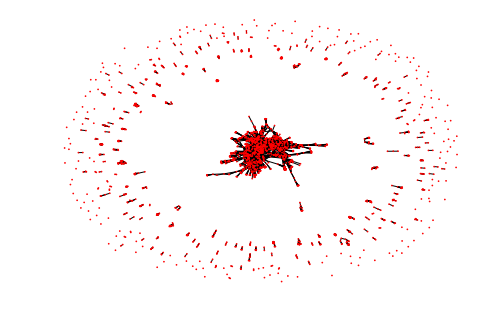

In [43]:
nx.draw(authors_graph,pos = nx.spring_layout(authors_graph),node_size=[0.5,0.5])

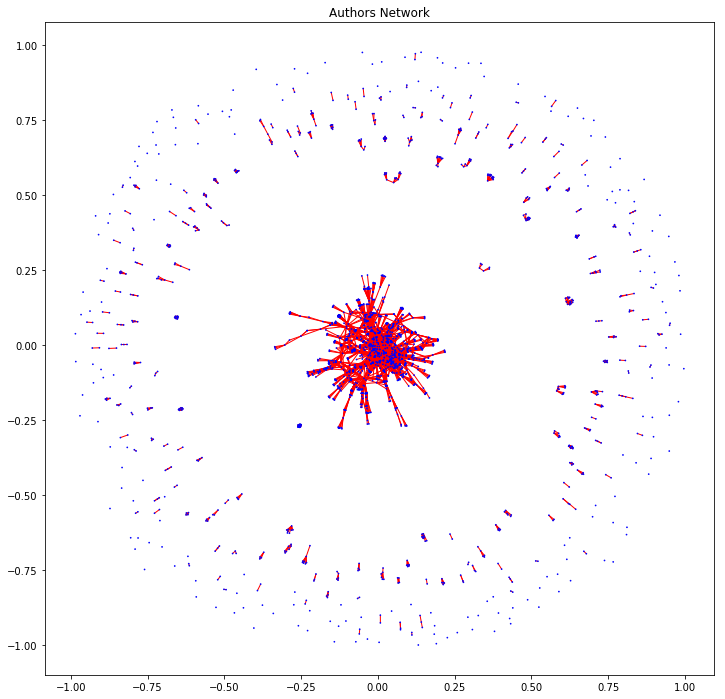

In [44]:
plt.figure(figsize=(12,12)) 
plt.title('Authors Network')
nx.draw_networkx(authors_graph,node_color='b',edge_color='r',node_size=[0.5,0.5],with_labels=False,pos= nx.spring_layout(authors_graph))
plt.show()


### Key words extraction

#### TF-IDF

In [50]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer


In [51]:
text = np.array(df_data['abstract'])

In [55]:
#ps = PorterStemmer()
#stemmer = SnowballStemmer("english")
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words())
l = ['the','and','of','is','with','it','this','to','but','not','in','for','some','as','no','was','just','would']
for word in l : 
    stop_words.add(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhechensu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [56]:
for i,abstract in enumerate(text): 
    try: 
        text[i] = re.sub(pattern='[^a-zA-Z]', repl=' ', string = abstract)
        text[i] = text[i].lower()
        text[i] = [word for word in text[i].split() if not word in stop_words]
        #text[i] = [stemmer.stem(t) for t in text[i]]
        #text[i] = [ps.stem(word) for word in text[i] if not word in set(stopwords.words('english'))]
        text[i] = ' '.join(text[i])
        
    except TypeError: 
        text[i] = ''

In [57]:
bow_transformer = CountVectorizer(ngram_range=(1,3)).fit(text)
len(bow_transformer.vocabulary_)

130794

In [58]:
#bow_transformer.vocabulary_

In [59]:
matrix_ = bow_transformer.transform(text)
matrix_.shape

(1043, 130794)

In [60]:
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(matrix_)

In [61]:
feature_names = bow_transformer.vocabulary_

In [62]:
#doc = 0
#feature_index = tfidf_matrix[doc,:].nonzero()[1]
#tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])

In [63]:
feature_names = {v: k for k, v in bow_transformer.vocabulary_.items()}


In [64]:
key_words = []
classment = []
for doc in range(len(text)):
    classment = []
    feature_index = tfidf_matrix[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        classment.append((w, s))
    classment.sort(key = lambda x : x[1],reverse=True)
    key_words.append(classment[:7])

In [65]:
key_words[:1]

[[('agency', 0.16969912953697283),
  ('epistemic agency', 0.16798562388292765),
  ('shared epistemic agency', 0.12242715202680828),
  ('shared epistemic', 0.11826556400735866),
  ('interdependence', 0.11826556400735866),
  ('shared', 0.11531671350874118),
  ('epistemic', 0.10835391218925199)]]

#### Using Rake

In [66]:
import rake
import operator

In [67]:
rake_object = rake.Rake("ressources/SmartStoplist.txt")

In [68]:
rake_object.run(df_data['abstract'][2]).sort(key = lambda x : x[1],reverse= True)

In [69]:
keywords = []
for abstract in df_data['abstract']:
    try:
        classment = rake_object.run(abstract)
        classment.sort(key = lambda x : x[1]>3,reverse= True)
        keywords.append(classment[:15])
    except TypeError: 
        keywords.append('no_text')

In [70]:
keywords[:3]

[[('ways epistemic agency', 8.75),
  ('shared epistemic agency', 8.416666666666666),
  ('involve knowledge construction', 8.25),
  ('creating intellectual interdependence', 8.0),
  ('structural context affords', 8.0),
  ('agency shows', 4.75),
  ('shared outcome', 4.666666666666666),
  ('collaborative knowledge', 4.25),
  ('knowledge work', 4.25),
  ('construct knowledge', 4.25),
  ('paper aims', 4.0),
  ('constituting aspects', 4.0),
  ('examine research', 4.0),
  ('theoretical works', 4.0),
  ('educational psychology', 4.0)],
 [('analyzing implementation fidelity data', 14.0),
  ('randomized controlled efficacy trial', 13.333333333333332),
  ('improving implementation fidelity', 10.0),
  ('middle school mathematics', 9.0),
  ('online homework tool', 8.5),
  ('rapidly developing techniques', 8.0),
  ('efficacy trial', 5.333333333333333),
  ('data captured', 5.0),
  ('online learning', 4.5),
  ('additional application', 4.0),
  ('beneficial effect', 4.0),
  ('case implementations', 4.0

### On the whole text

In [71]:
#print(raw['content'])

In [72]:
import sys
import os

In [73]:
j = 0
TOTEXT = 'pdftotext -nopgbrk -eol mac'
rootdir = '/Users/nourghaliaabassi/Desktop/paper2'

for subdir, dirs, files in os.walk(rootdir):
    #print(files)
    for file in files:
       
        path = os.path.join(subdir, file)
        #print(path)
        if 'pdf' in path:
            j = j + 1 
            #print(path)
            os.system(TOTEXT + path)

In [74]:
rootdir = 'data/papers'
contents = []
i = 0
source = []
errors = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if 'txt' in file:
            i += 1
            path = os.path.join(subdir, file)
            with open(path) as file:
                try:
                    text = file.read()
                    contents.append(text)
                    source.append(subdir[len(rootdir):])
                except:
                    name, message, content = sys.exc_info()
                    errors.append(message)


In [75]:
len(contents)

1125

In [76]:
selection = contents[0][contents[0].find('Introduction'):contents[0].find('\n\nReferences\n')]

In [77]:
keywords_in_text = []
for text_ in contents:
    selection = text_[text_.find('Introduction'):text_.find('\n\nReferences\n')]
    if selection == '' and text_ != ' ':
        selection = text_[text_.find('Keywords'):text_.find('\n\nReferences\n')]
    try:
        classment = rake_object.run(selection)
        classment.sort(key = lambda x : x[1]>3,reverse= True)
        keywords_in_text.append(classment[:15])
    except TypeError: 
        keywords_in_text.append('PROBLEM')

In [78]:
l = [['' for i in range(15)] for elem in range(len(keywords_in_text))]
for i,elem in enumerate(keywords_in_text):
    l2 = ''
    for elem2 in elem:
        l2 = l2 + ',' +(elem2[0])
    l[i] = l2


In [79]:
l[:10]

[',teacher expectations affect student outcomes,preliminary data analysis suggests students,knowledge lower income students bring,data include annual surveys,role models begetting future role,women entering stem fields tend,latina mothers advice based,institution support undergraduate stem education,nonstereotypical role models develop,larger negative stereotyping discourse,stereotypical” role models develop,proleptic references include stories,navigate stem institutions contributing,national education longitudinal study,salient social categories began',
 ',date types generation strategies,“biggest design challenge” samuel stated,pass involved identifying important resources,driving technically oriented design work,social injustices loom large,fairly vague technical challenge,specific data generation strategy,data analysis involved multiple stages,exposing oppressive narratives experienced,final phase involved writing,fairly wide open task,pro football star hangs,productive project lau

In [80]:
df_key_words = pd.DataFrame(l, columns = {'key_words_rak'})


In [81]:
keywords_in_text[:1]

[[('teacher expectations affect student outcomes', 18.283333333333335),
  ('preliminary data analysis suggests students', 16.814705882352943),
  ('knowledge lower income students bring', 15.240896358543417),
  ('data include annual surveys', 14.8),
  ('role models begetting future role', 14.761006289308176),
  ('women entering stem fields tend', 14.134343434343435),
  ('latina mothers advice based', 13.5),
  ('institution support undergraduate stem education', 13.46767676767677),
  ('nonstereotypical role models develop', 13.213836477987421),
  ('larger negative stereotyping discourse', 12.166666666666666),
  ('stereotypical” role models develop', 11.928122192273136),
  ('proleptic references include stories', 11.666666666666666),
  ('navigate stem institutions contributing', 11.245454545454546),
  ('national education longitudinal study', 11.126984126984127),
  ('salient social categories began', 10.595238095238095)]]

### With TF_IDF

In [82]:
len(contents)

1125

In [83]:
tmp_content = []
for text_ in contents:
    selection = text_[text_.find('Introduction'):text_.find('\n\nReferences\n')]
    if selection == '' and text_ != ' ':
        selection =text_[text_.find('Keywords'):text_.find('\n\nReferences\n')]
    if selection == '' and text_ != ' ':
        selection = text_[:text_.find('\n\nReferences\n')]
    if '...............................' in selection :
        selection = ''
    tmp_content.append(selection)

In [84]:
len(tmp_content)

1125

In [85]:
for i,text_ in enumerate(tmp_content): 
    #try: 
        tmp_content[i] = re.sub(pattern='[^a-zA-Z]', repl=' ', string = text_)
        tmp_content[i] = tmp_content[i].lower()
        tmp_content[i] = [word for word in tmp_content[i].split() if not word in stop_words]
        #text[i] = [ps.stem(word) for word in text[i] if not word in set(stopwords.words('english'))]
        tmp_content[i] = ' '.join(tmp_content[i])
    #except TypeError: 
        #tmp_content[i] = ''

In [86]:
bow_transformer_big = CountVectorizer(ngram_range=(1,3),max_df=0.8, max_features=2500).fit(tmp_content)

In [87]:
len(bow_transformer_big.vocabulary_)

2500

In [88]:
matrix_big = bow_transformer_big.transform(np.array(tmp_content)[np.array(tmp_content)!=''])
matrix_big.shape

(1116, 2500)

In [89]:
tfidf_transformer_2 = TfidfTransformer()
tfidf_matrix_2 = tfidf_transformer_2.fit_transform(matrix_big)

In [90]:
feature_names_big = {v: k for k, v in bow_transformer_big.vocabulary_.items()}


In [91]:
key_words_large = []
classment_large = []
for doc in range(len(np.array(tmp_content)[np.array(tmp_content)!=''])):
    classment_large = []
    feature_index_big = tfidf_matrix_2[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index_big, [tfidf_matrix_2[doc, x] for x in feature_index_big])
    for w, s in [(feature_names_big[i], s) for (i, s) in tfidf_scores]:
        classment_large.append((w, s))
    classment_large.sort(key = lambda x : x[1],reverse=True)
    key_words_large.append(classment_large[:15])

In [92]:
l = [['' for i in range(15)] for elem in range(len(key_words_large))]
for i,elem in enumerate(key_words_large):
    l2 = ''
    for elem2 in elem:
        l2 = l2 +',' +(elem2[0])
    l[i] = l2

In [93]:
df_key_words.merge(pd.DataFrame(l,columns = {'key_words_tf_idf'}),left_index = True, right_index = True).to_csv('data_key_words.csv')

In [94]:
df_key_words.head()

key_words_rak
0  ,teacher expectations affect student outcomes,...
1  ,date types generation strategies,“biggest des...
2                                                   
3                                                   
4

In [95]:
key_words_large[:1]

[[('stem', 0.40320898743766925),
  ('women', 0.27895894283391126),
  ('instructors', 0.26739897756077946),
  ('role', 0.23758689336440142),
  ('college', 0.2192288883406173),
  ('identity', 0.20270296771483307),
  ('models', 0.20028302056140285),
  ('youth', 0.1618331243424286),
  ('positioning', 0.15355496943964433),
  ('trajectories', 0.14432281006519018),
  ('positioned', 0.14320067201303602),
  ('imagined', 0.1374079350695763),
  ('program', 0.12702691745447958),
  ('university', 0.11408527817181596),
  ('identification', 0.11257948917260961)]]

## Doc clustering

In [96]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from collections import Counter


In [97]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
%time km.fit(tfidf_matrix_2)
clusters = km.labels_.tolist()

CPU times: user 4min 54s, sys: 1.53 s, total: 4min 56s
Wall time: 1min 27s


In [98]:
Counter(clusters)

Counter({6: 88, 3: 143, 0: 194, 2: 204, 1: 388, 5: 46, 4: 53})

In [99]:
titles = [content[:content.find('\n')] if '...............................' not in content else '' for content in contents]

In [100]:
len(np.array(tmp_content)[np.array(tmp_content)!=''])

1116

In [101]:
tmp = {'titles': np.array(titles)[np.array(titles)!=''], 'texts' : np.array(tmp_content)[np.array(tmp_content)!=''], 'clusters': clusters}
df_clusters = pd.DataFrame.from_dict(tmp)

In [102]:
df_clusters.head()

titles  \
0   Encountering and Becoming Role Models: Combating   
1  Mobilities of Criticality: Space-Making, Ident...   
2  Redistributing Epistemic Agency: How Teachers ...   
3  Measuring Integrated Knowledge – A Network Ana...   
4  Rising Above? Implications of Complexity for T...   

                                               texts  clusters  
0  keywords community engagement outreach informa...         6  
1  introduction manuscript examine stories youth ...         6  
2  redistributing epistemic agency teachers open ...         3  
3  measuring integrated knowledge network analyti...         0  
4  rising implications complexity theories learni...         2

In [103]:
df_clusters[df_clusters['titles']=='']

Empty DataFrame
Columns: [titles, texts, clusters]
Index: []

In [104]:
km.cluster_centers_.argsort()[:, ::-1]

array([[1980, 1439, 1986, ...,  763, 1269, 1239],
       [1009,  344, 2266, ..., 1233, 2103, 1787],
       [ 572, 2101, 1699, ..., 1802,  517, 1692],
       ...,
       [1249, 1250,  762, ...,  190,   73,  931],
       [ 959,  961, 1668, ...,  232, 1506, 2499],
       [2497, 1980, 1077, ..., 1787, 2272, 2499]])

### Visualization of clusters : 

In [105]:
import warnings
warnings.filterwarnings("ignore")

In [106]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5:'#000000',6 : '#0000FF' }


In [107]:
import os  # for os.path.basename
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS

def plot_cos_dist_clust(X,clusters):
    MDS()
    dist = 1 - cosine_similarity(X)

    # convert two components as we're plotting points in a two-dimensional plane
    # "precomputed" because we provide a distance matrix
    # we will also specify `random_state` so the plot is reproducible.
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

    pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

    xs, ys = pos[:, 0], pos[:, 1]
    %matplotlib inline 

    #create data frame that has the result of the MDS plus the cluster numbers and titles
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=np.array(titles)[np.array(titles)!=''])) 

    #group by cluster
    groups = df.groupby('label')


    # set up plot
    fig, ax = plt.subplots(figsize=(60, 40)) # set size
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    #iterate through groups to layer the plot
    #note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                 color=cluster_colors[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         # changes apply to the y-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelleft='off')

    ax.legend(numpoints=1)  #show legend with only 1 point

    #add label in x,y position with the label as the film title
    for i in range(len(df)):
        ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  


    plt.savefig('clusters_small.png')
    plt.show() #show the plot
    
    return 
    

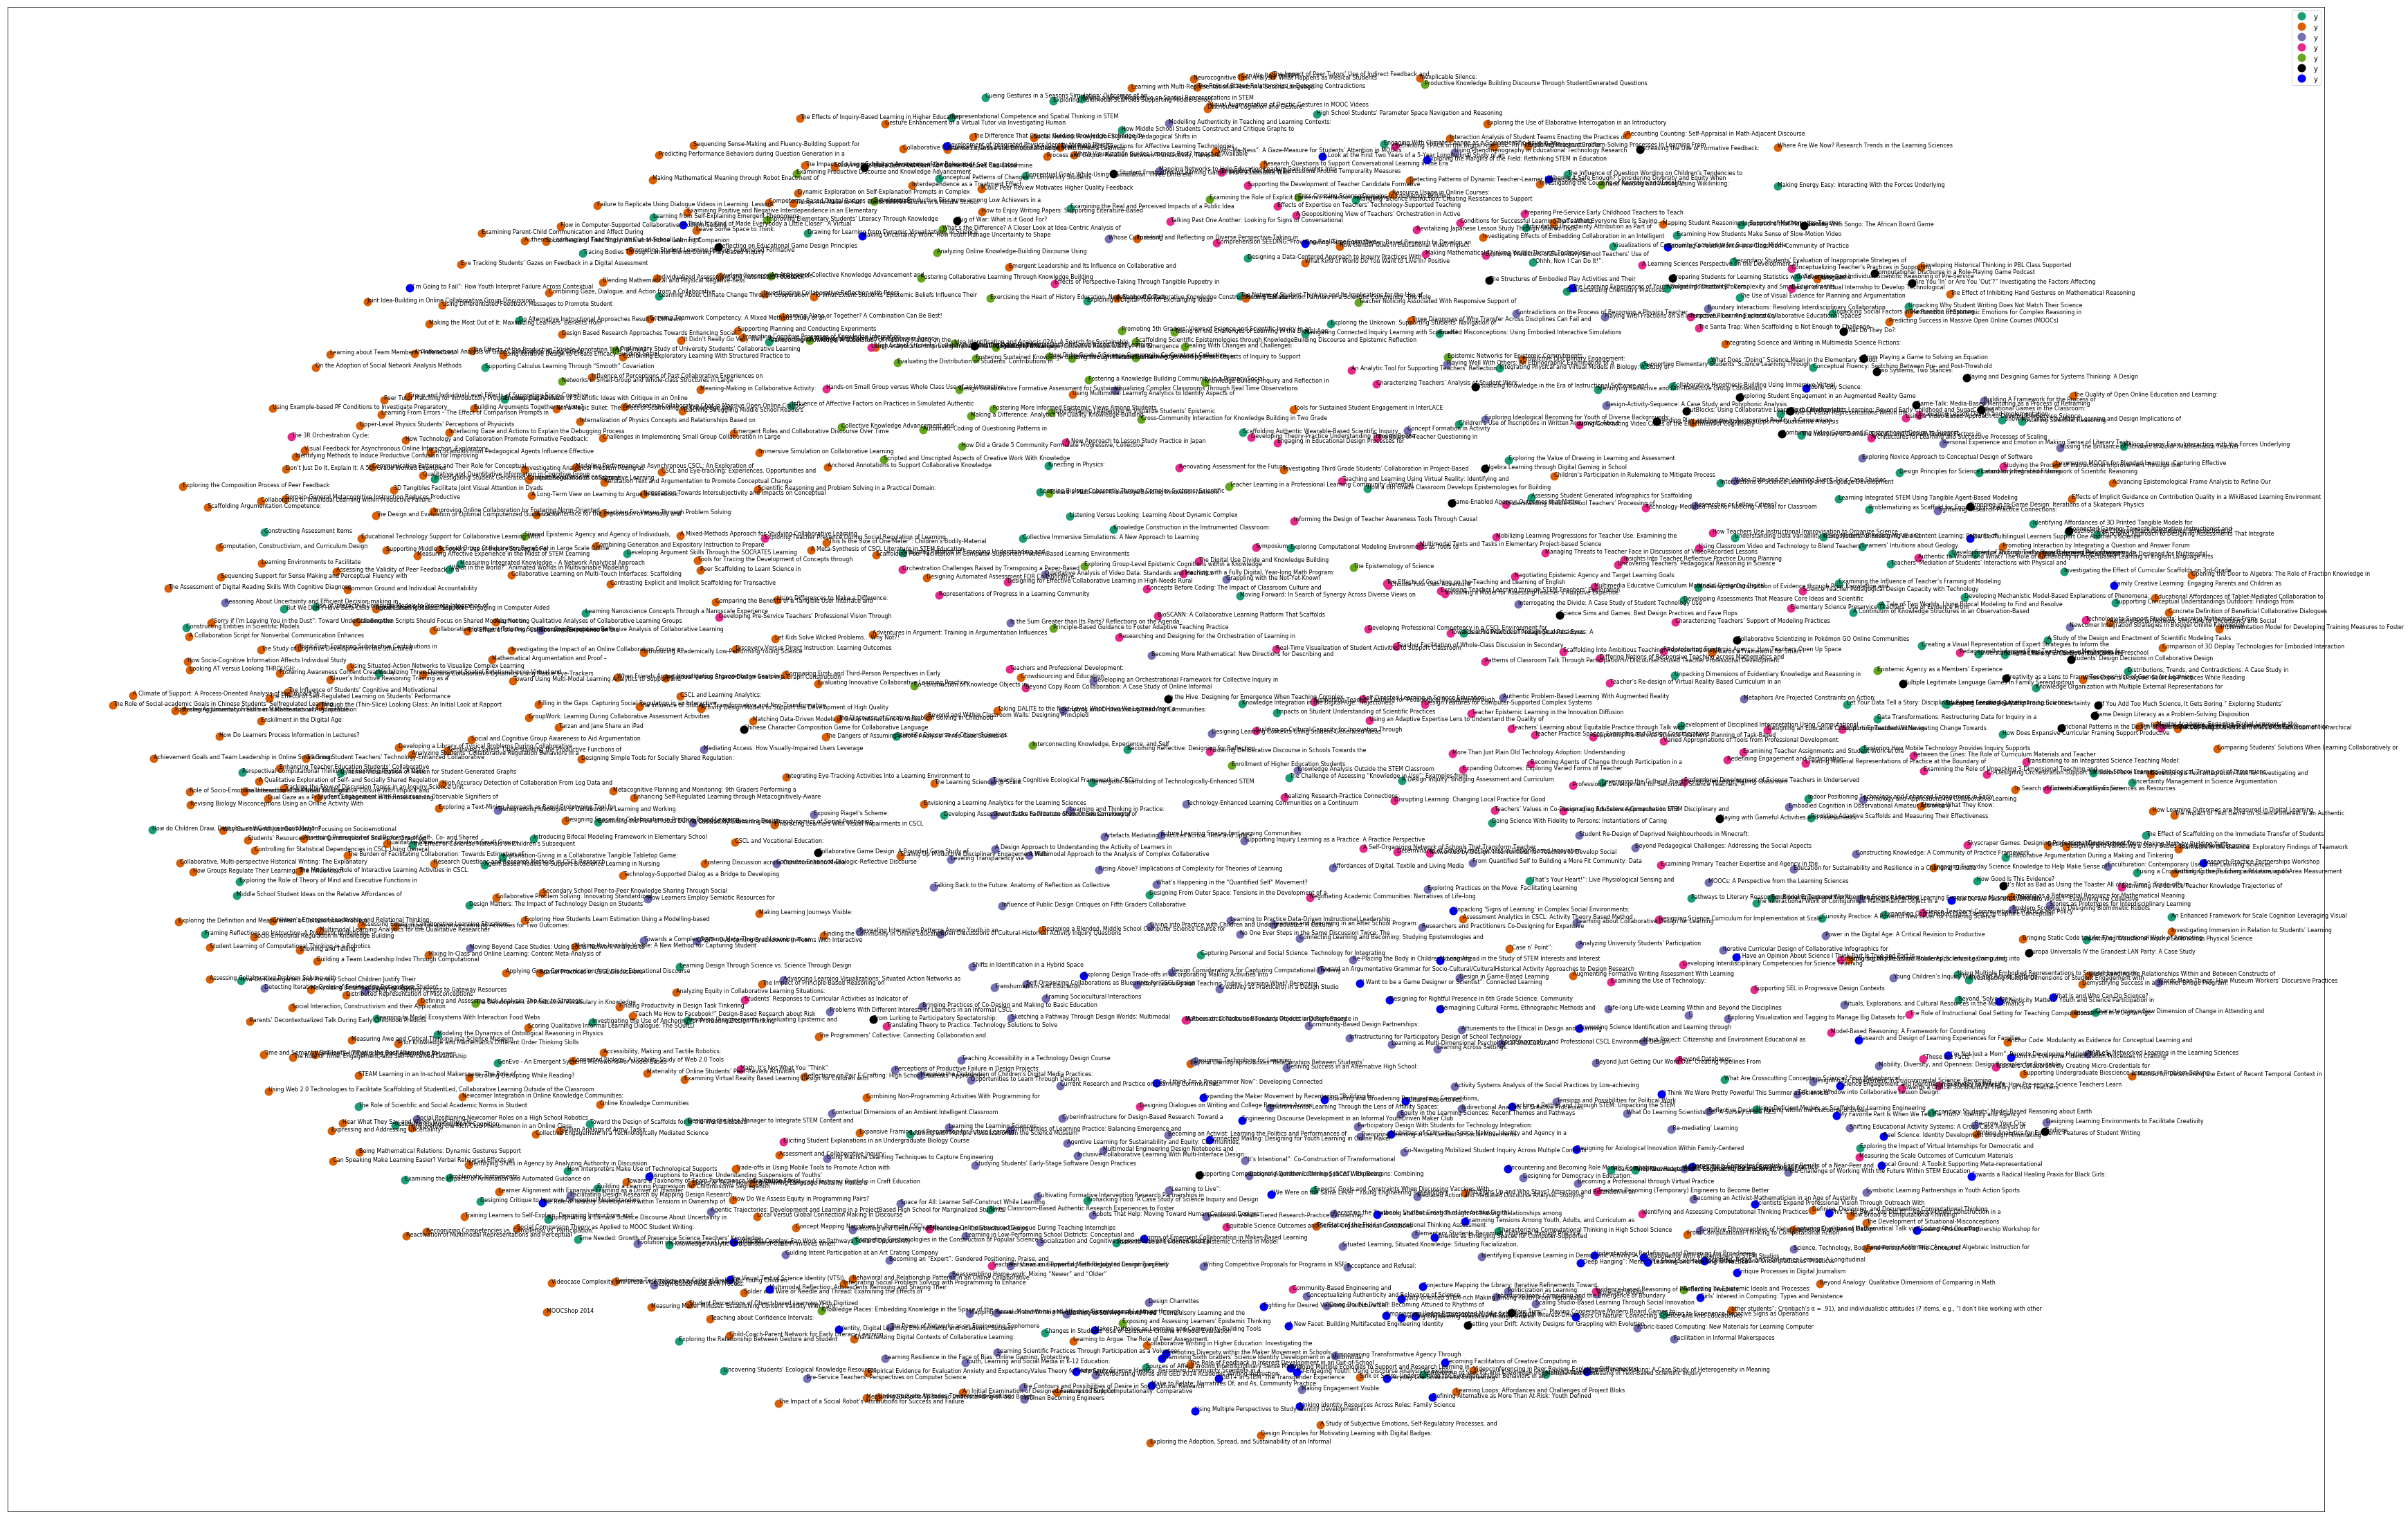

In [108]:
plot_cos_dist_clust(tfidf_matrix_2,clusters)

In [109]:
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


def see_clusters(X,clusters,range_n_clusters):
    silhouette = []
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        silhouette.append(silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:,0], X[:,1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    return silhouette, range_n_clusters

For n_clusters = 2 The average silhouette_score is : 0.011500304314217632
For n_clusters = 5 The average silhouette_score is : 0.014297530944835867
For n_clusters = 7 The average silhouette_score is : 0.016618900162001217
For n_clusters = 10 The average silhouette_score is : 0.022207103457083828
For n_clusters = 20 The average silhouette_score is : 0.02513716701109383
For n_clusters = 30 The average silhouette_score is : 0.0288824373328081
For n_clusters = 50 The average silhouette_score is : 0.03559573405266757
For n_clusters = 70 The average silhouette_score is : 0.03836408021114828
For n_clusters = 100 The average silhouette_score is : 0.04455803383759799


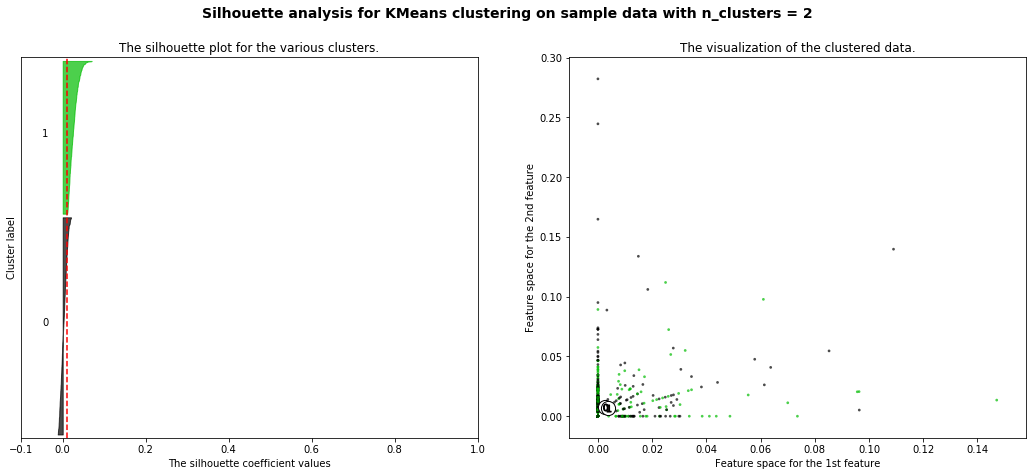

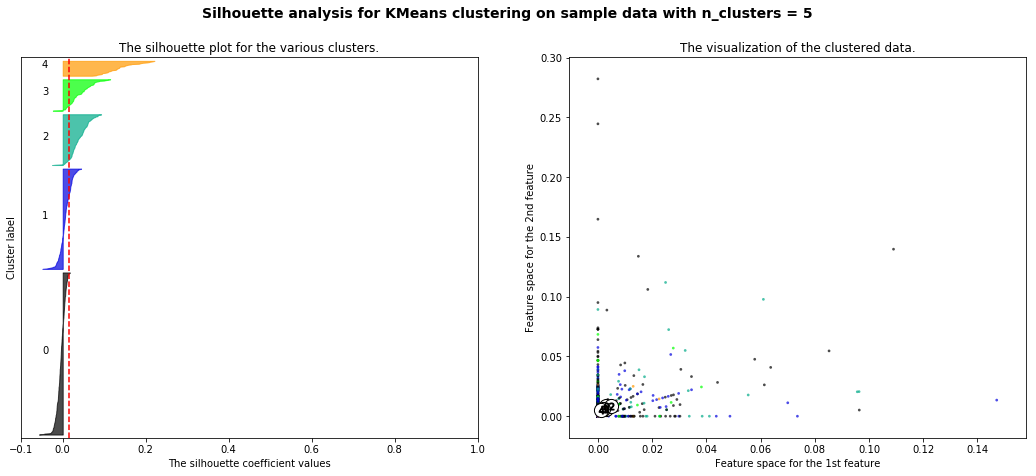

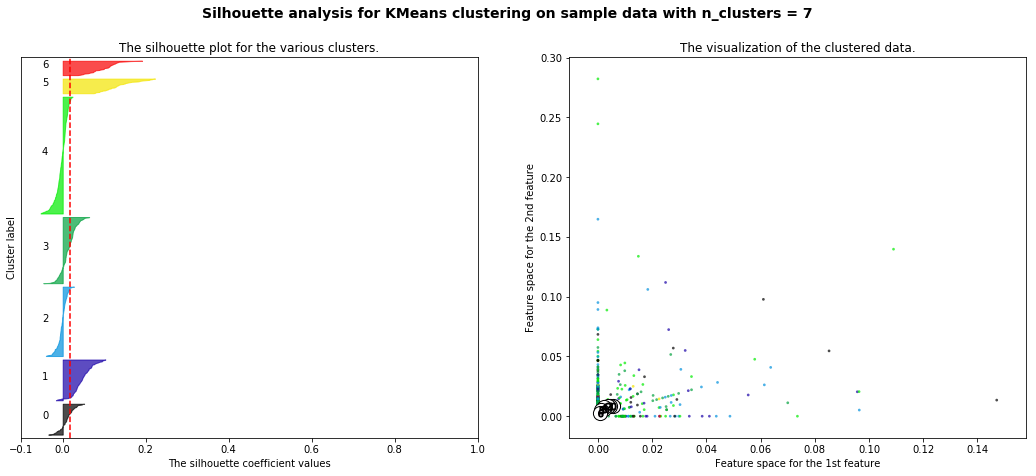

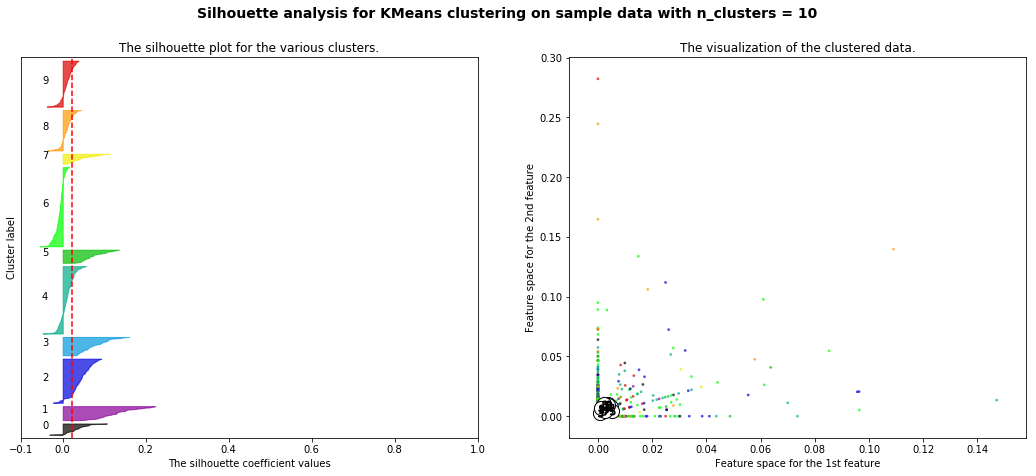

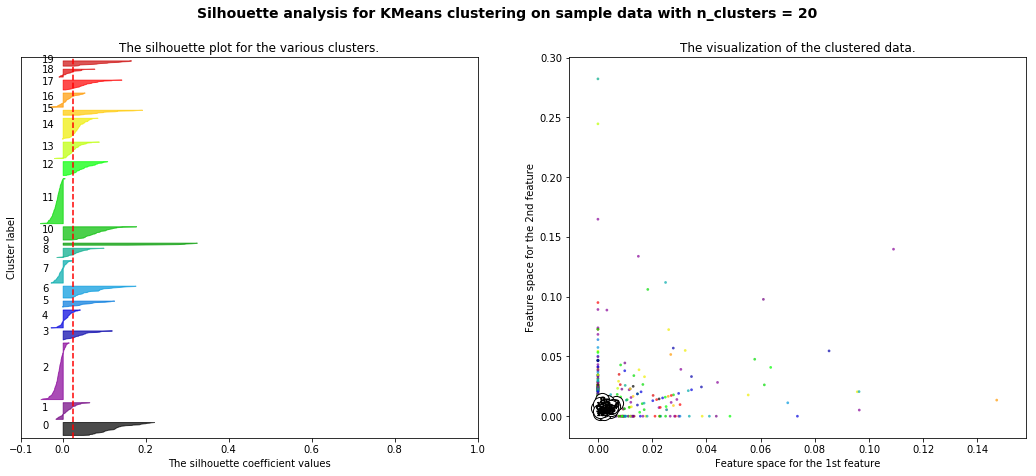

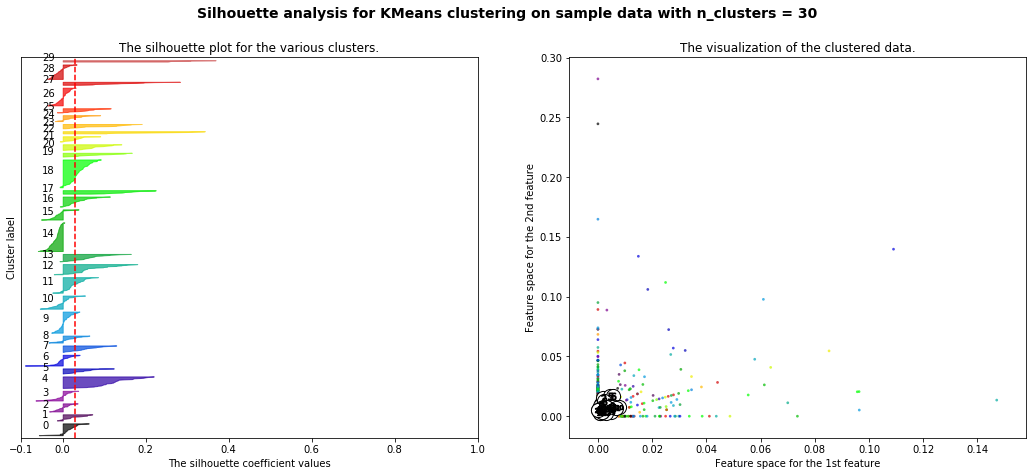

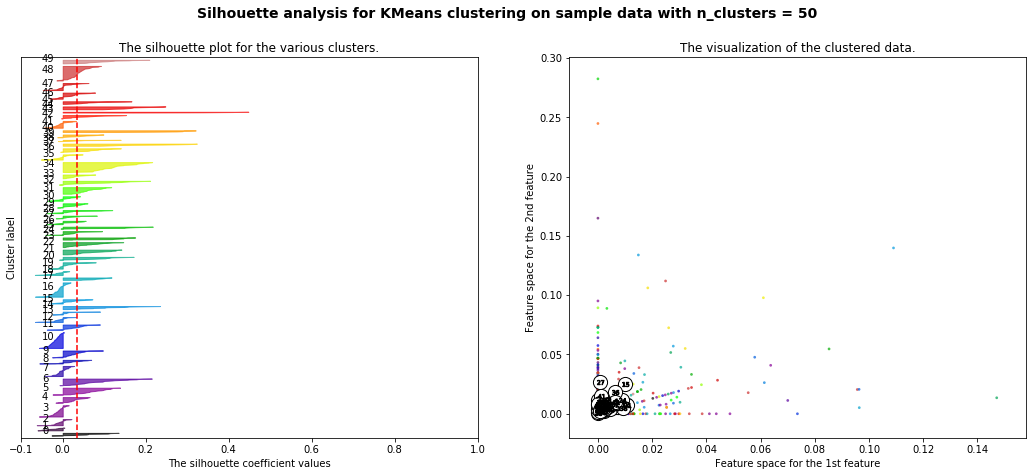

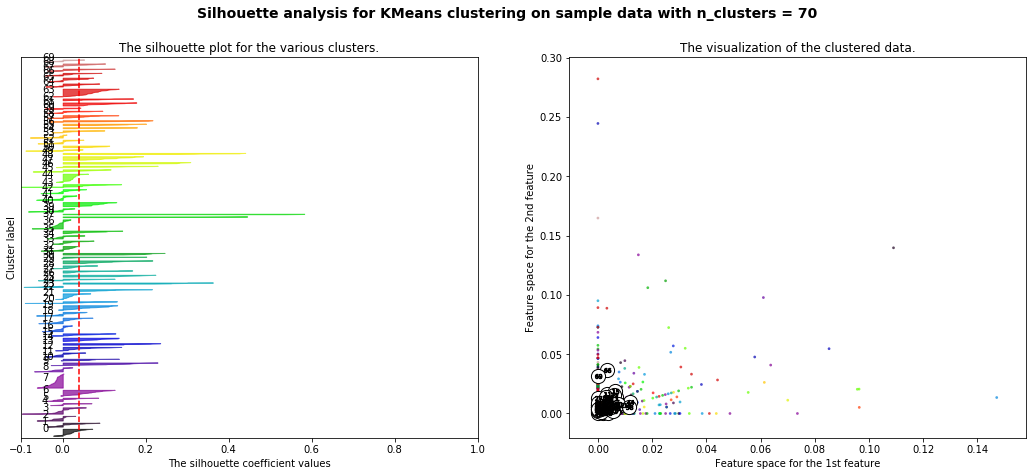

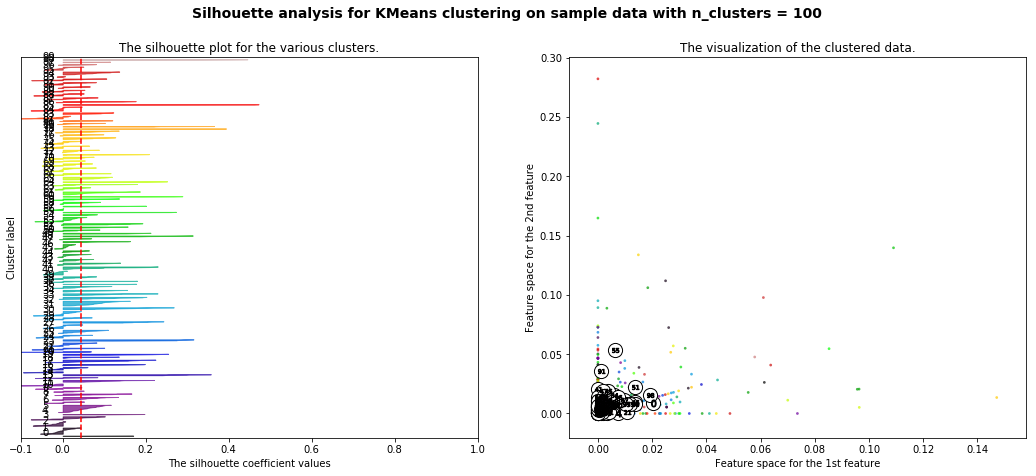

In [110]:
silhouette, range_n_clusters = see_clusters(tfidf_matrix_2.toarray(),clusters,range_n_clusters = [2,5,7,10,20,30,50,70,100])

In [111]:
len(silhouette) == len(range_n_clusters)

True

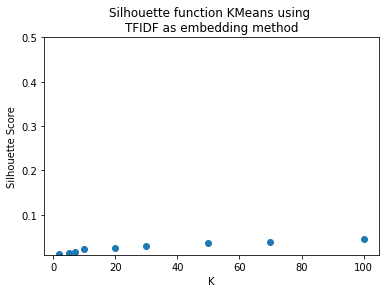

In [112]:
# Plotting the silhouette function to assess the best K to use
plt.scatter(range_n_clusters, silhouette)
plt.ylim(ymin= 0.01 ,ymax = 0.5)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette function KMeans using \nTFIDF as embedding method')
plt.savefig('sil_km_tfidf')

In [113]:
tfidf_matrix_2.shape

(1116, 2500)

### v_measure 

In [114]:
#from sklearn.metrics.cluster import v_measure_score
#v_measure_score(tfidf_matrix_2, cluster_labels)

#### Find distinct keywords in each cluster

In [115]:
words_each_cluster = km.cluster_centers_.argsort()[:, ::-1]

In [116]:
distinct = []
for cluster in words_each_cluster:
    bool_ = False
    tmp = set(cluster[:50])
    not_modified = set(cluster[:50])
    for other in words_each_cluster:
        tmp2 = set(other[:50])
        bool_ = (not_modified != tmp2)
        if bool_:
            tmp = tmp - set(other[:50])
    distinct.append(tmp)

In [117]:
distinct[:1]

[{127,
  285,
  308,
  409,
  410,
  707,
  736,
  828,
  829,
  978,
  1359,
  1441,
  1442,
  1457,
  1646,
  1648,
  1833,
  1896,
  1986,
  2388,
  2435,
  2449}]

In [118]:
#feature_names_big[:10]

In [119]:
from __future__ import print_function

order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

print("Top distinct terms per cluster: \n" )    
for i,set_ in enumerate(distinct): #replace 6 with n words per cluster
    print("Cluster %d words:" % i, end='')
    
    for elem in set_:
        print(' %s' % feature_names_big[elem],end = ',')
    print('\n') 
    
    print("Cluster %d titles:" % i, end='\n' )
    for title in df_clusters['titles'][df_clusters['clusters']== i]:
        print(' ** %s,' % title)
        #print()
    print() #add whitespace
    print() #add whitespace
    

Top distinct terms per cluster: 

Cluster 0 words: virtual, water, concepts, conceptual, change, modeling, models, reasoning, motion, claim, explanation, explanations, scientific, embodied, make, gestures, unit, energy, representations, phenomena, physical, argumentation,

Cluster 0 titles:
 ** Measuring Integrated Knowledge – A Network Analytical Approach,
 ** The Challenge of Assessing “Knowledge in Use”: Examples from,
 ** What Are Crosscutting Concepts in Science? Four Metaphorical,
 ** How Middle School Students Construct and Critique Graphs to,
 ** Designing Critique to Improve Conceptual Understanding,
 ** Integrating Physical and Virtual Models in Biology: A Study of,
 ** Learning Integrated STEM Using Tangible Agent-Based Modeling,
 ** A Tale of Two Worlds: Using Bifocal Modeling to Find and Resolve,
 ** What Does “Doing” Science Mean in the Elementary School,
 ** Turning to Experience Negative Signs as Operations,
 ** Constructing Entities in Scientific Models,
 ** The Use of

##### Create csv for gephi 

In [120]:
df_authors = pd.DataFrame(data = authors_nodes, columns = ['Label'])

In [121]:
df_authors['Id'] = [i for i in range(len(df_authors))]

In [122]:
df_authors.head()

Label  Id
0        Koretsky, Milo   0
1   Bogouslavsky, Maria   1
2     Slattery, Michael   2
3    Palius, Marjory F.   3
4  Puntambekar, Sadhana   4

In [123]:
df_edges = pd.DataFrame(data= authors_edges, columns=['Source_name','Target_name'])

In [124]:
dict_ = df_authors.set_index('Id').to_dict(orient= 'dict')
inv_map = {v: k for k, v in dict_['Label'].items()}

In [125]:
df_authors.to_csv('ressources/authors.csv')
df_edges.to_csv('ressources/authors_edges.csv')

In [126]:
df_edges.head()

Source_name           Target_name
0     Bereiter, Carl        Zhang, Jianwei
1  Abbott, Robert D.         Lee, Nathanie
2      Rummel, Nikol     Blair, Kristen P.
3       Enyedy, Noel        Froehlich, Jon
4       Chinn, Clark  Sandoval, William A.

In [127]:
#df_edges['Source'] = [inv_map[elem] for elem in df_edges['Source']]
#df_edges['Target'] = [inv_map[elem] for elem in df_edges['Target_name']]

In [128]:
#df_edges = df_edges[['Source','Target']]

In [129]:
#df_edges.to_csv('authors_edges.csv')

### Try to analyze the network : 

In [130]:
nx.connected_component_subgraphs(authors_graph)

<generator object connected_component_subgraphs at 0x1a400851a8>

In [131]:
gen = nx.connected_component_subgraphs(authors_graph)

In [132]:
page_rank = sorted(nx.pagerank(authors_graph).items(), key=lambda kv: kv[1], reverse= True)

In [133]:
page_rank[:5]

[('Rummel, Nikol', 0.003971533395160706),
 ('Hall, Rogers', 0.0027199980036909507),
 ('Bang, Megan', 0.0025331942396976145),
 ('Fischer, Frank', 0.002362472104705748),
 ('Zhang, Jianwei', 0.0021570473529648714)]

In [134]:
def graph_author(author): 
    selected_ = []
    for i,elem in enumerate(df_data['author']):
        #print(elem)
        if author in elem: 
            selected_.append(i)
    df_data.iloc[selected_,:].groupby(['year'])['year'].count().plot(kind='bar')
    plt.title('number of publications per year intervals for ' + author)
    plt.xlabel('years')
    plt.ylabel('publications_count')
    plt.tight_layout()
    return 

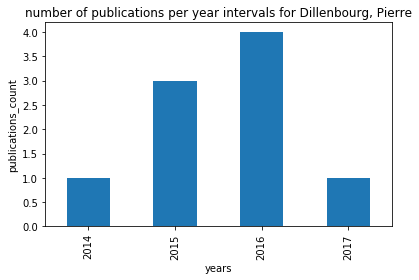

In [135]:
graph_author('Dillenbourg, Pierre')

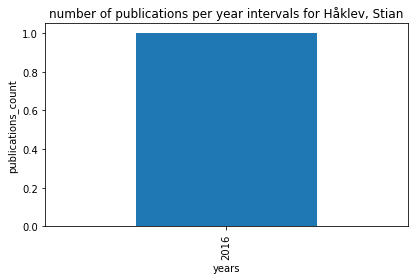

In [136]:
graph_author('Håklev, Stian')

In [137]:
nx.average_degree_connectivity(authors_graph)

{5: 8.573643410852712,
 1: 7.213178294573644,
 0: 0,
 3: 5.796717171717172,
 21: 25.1859410430839,
 14: 19.472906403940886,
 4: 8.418367346938776,
 6: 12.416666666666666,
 16: 20.651785714285715,
 8: 12.684121621621621,
 2: 6.415057915057915,
 10: 14.947368421052632,
 12: 20.396464646464647,
 9: 14.33531746031746,
 7: 10.622331691297209,
 11: 15.610993657505285,
 17: 17.255656108597286,
 13: 17.216117216117215,
 25: 27.23,
 35: 23.678571428571427,
 20: 22.286666666666665,
 19: 26.928229665071772,
 15: 19.185416666666665,
 48: 23.875,
 27: 19.88888888888889,
 22: 25.76839826839827,
 23: 16.77391304347826,
 55: 23.363636363636363,
 26: 24.115384615384617,
 77: 13.324675324675324,
 32: 22.572916666666668,
 40: 21.808333333333334,
 24: 19.933333333333334,
 50: 24.3,
 18: 24.65432098765432,
 37: 21.410810810810812,
 43: 21.930232558139537,
 53: 26.00943396226415,
 38: 24.87280701754386,
 28: 17.107142857142858,
 31: 23.193548387096776,
 34: 22.0,
 30: 19.783333333333335,
 39: 26.46153846153

In [138]:
#nx.degree(authors_graph)

### Clustering using Glove

In [147]:
path = '/Users/zhechensu/Downloads/glove.6B.100d.txt'

In [148]:
# Method for loading a text file in a DataFrame (each row corresponds to a line)
def load_data(path):
    with open(path) as file:
        words_file = pd.DataFrame([line.rstrip() for line in file])
    return words_file

In [149]:
# Method to load glove vectors from glove.6B, which is a file from stanford containing pre-trained glove vectors on
# wikipedia, which is more appropriate in our case than twitter glove vectors even if it contains less than for twitter.
def load_glove(path,n =100,):
    """Loading glove vectors
    n is the dimension of the vectors, can be 50, 100, 200 or 300"""
    glove_vectors_100 = load_data(path)
    glove_vectors_100[0] = glove_vectors_100[0].apply(lambda x : x.split(' ',1))
    words = pd.DataFrame(glove_vectors_100[0].apply(lambda x : x[0]))
    words['Vectors']= glove_vectors_100[0].apply(lambda x : x[1])
    del(glove_vectors_100)
    words.rename(columns={0:'Words'},inplace=True)
    words['Words'] = words.apply(lambda x : [elem.replace('<','').replace('>','') for elem in x ])
    words.set_index('Words',inplace=True)
    return words

In [150]:
glove_df = load_glove(path)

In [151]:
# import zipfile

In [152]:
# zf = zipfile.ZipFile('/Users/nourghaliaabassi/Desktop/glove100.csv.zip','r')

In [153]:
# csv = zf.extract('glove100.csv')

In [154]:
# glove_df = pd.read_csv(csv)

In [155]:
glove_df.head()

Vectors
Words                                                   
the    -0.038194 -0.24487 0.72812 -0.39961 0.083172 0...
,      -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10...
.      -0.33979 0.20941 0.46348 -0.64792 -0.38377 0.0...
of     -0.1529 -0.24279 0.89837 0.16996 0.53516 0.487...
to     -0.1897 0.050024 0.19084 -0.049184 -0.089737 0...

In [156]:
glove_df.head()

Vectors
Words                                                   
the    -0.038194 -0.24487 0.72812 -0.39961 0.083172 0...
,      -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10...
.      -0.33979 0.20941 0.46348 -0.64792 -0.38377 0.0...
of     -0.1529 -0.24279 0.89837 0.16996 0.53516 0.487...
to     -0.1897 0.050024 0.19084 -0.049184 -0.089737 0...

In [157]:
glove_df.to_csv('glove100.csv')

In [158]:
glove_df['Vectors'] = glove_df['Vectors'].apply(lambda x : x.split())

# dict_of_words_vect = glove_df.set_index('Words').to_dict()['Vectors']
dict_of_words_vect = glove_df.to_dict()['Vectors']

In [159]:
tfidf_matrix_2.toarray()[0]

array([0.        , 0.        , 0.00959213, ..., 0.16183312, 0.        ,
       0.        ])

In [160]:
feature_index = tfidf_matrix_2[doc,:].nonzero()[1]

In [161]:
max_len = max([len(s) for s in feature_names_big.values()])

In [162]:
def get_all_index_for_documents(tfidf_matrix_2):
    new_matrix = np.chararray(tfidf_matrix_2.shape, itemsize = max_len)
    for doc in range(new_matrix.shape[0]):
        feature_index = tfidf_matrix_2[doc,:].nonzero()[1]
        for index in feature_index:
            new_matrix[doc,index] =  feature_names_big[index]

    return new_matrix

In [163]:
new_matrix = get_all_index_for_documents(tfidf_matrix_2)

In [164]:
new_matrix

chararray([['', '', b'able', ..., b'youth', '', ''],
           ['', '', b'able', ..., b'youth', b'youths', ''],
           ['', '', b'able', ..., '', '', ''],
           ...,
           ['', b'ability', b'able', ..., '', '', ''],
           ['', '', '', ..., '', '', ''],
           [b'abilities', b'ability', b'able', ..., '', '', '']],
          dtype='|S32')

In [165]:
len(new_matrix[0])

2500

In [166]:
def assign_vectors(matrix, dict_of_words_vect):
    new_matrix = []
    missed = set()
    for elem in matrix:
        representations = []
        for word in elem: 
            sum_ = np.zeros((100,))
            try : 
                if type(word) != type(''):
                    word = word.decode('utf-8')
                representations.append(np.array(list(map(lambda x : float(x),dict_of_words_vect[word]))))
            except KeyError:
                new_sentence = word.split()
                if len(new_sentence) > 1: 
                    for subword in new_sentence: 
                        try : 
                            sum_ += np.array(list(map(lambda x : float(x),dict_of_words_vect[subword])))
                        except KeyError : 
                            missed.add(subword)
                    representations.append(sum_)
                    sum_ = np.zeros((100,))            
        new_matrix.append(representations)
    print(missed)
    return new_matrix

In [167]:
vectors_doc = assign_vectors(new_matrix,dict_of_words_vect)

{'icls', 'posttest', 'isls', 'bereiter', 'scardamalia'}


In [168]:
average_vector = np.array(list(map(lambda x : np.mean(x,axis = 0),vectors_doc)))


In [169]:
average_vector[0]

array([-1.19259569,  0.64478569,  0.04351214,  0.58068722, -1.1708897 ,
       -0.08492418,  0.27444282, -0.0969461 ,  0.0951295 ,  0.44720314,
        0.58870057,  0.14653834, -0.04171129,  0.28268127,  0.64149553,
       -0.31748141,  0.08797445,  0.08427837,  0.07428992,  0.63104523,
        0.31299685, -0.0849615 , -0.25494657, -0.08135271,  0.14116634,
        0.82052778, -0.08363089,  0.04848187,  0.33025682, -0.59932021,
       -0.06690881,  0.2889414 ,  0.33264528, -0.27410592,  0.51623894,
        0.75284628,  0.57289199,  0.87834529,  0.05521748,  0.47424782,
        0.42708479, -0.73437019, -0.34151116, -0.39494034,  0.03470704,
       -0.77476048,  0.13212263,  0.41758736, -0.29141476, -0.16853549,
        0.23811668,  0.2305914 , -0.27992427,  0.08538101, -0.77422359,
       -0.1167554 , -0.18392407,  0.21164397,  0.72272022,  0.50119376,
       -0.35475766,  0.02657772, -0.88523938, -0.32167003,  1.02795733,
        0.40155006,  0.07691364, -0.11214437,  0.81357336,  0.35

### Clustering 

In [170]:
num_clusters = 2
km_glove = KMeans(n_clusters=num_clusters)
%time km_glove.fit(average_vector)
clusters_glove = km_glove.labels_.tolist()

CPU times: user 350 ms, sys: 14 ms, total: 364 ms
Wall time: 67 ms


For n_clusters = 2 The average silhouette_score is : 0.6365947552247627
For n_clusters = 3 The average silhouette_score is : 0.5725026608478186
For n_clusters = 5 The average silhouette_score is : 0.4740935059607335
For n_clusters = 7 The average silhouette_score is : 0.3977272104046227
For n_clusters = 10 The average silhouette_score is : 0.3463641209764603
For n_clusters = 20 The average silhouette_score is : 0.22348239040881845


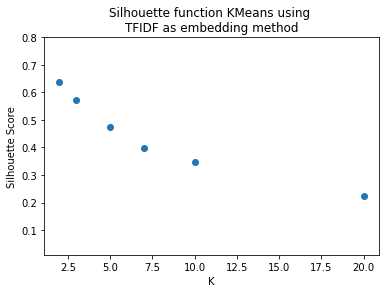

In [171]:
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2,3,5,7,10,20]
silhouette = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(average_vector)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(average_vector, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tfidf_matrix_2, cluster_labels)

plt.scatter([2,3,5,7,10,20], silhouette)
plt.ylim(ymin= 0.01 ,ymax = 0.8)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette function KMeans using \nTFIDF as embedding method')
plt.savefig('sil_km_tfidf')

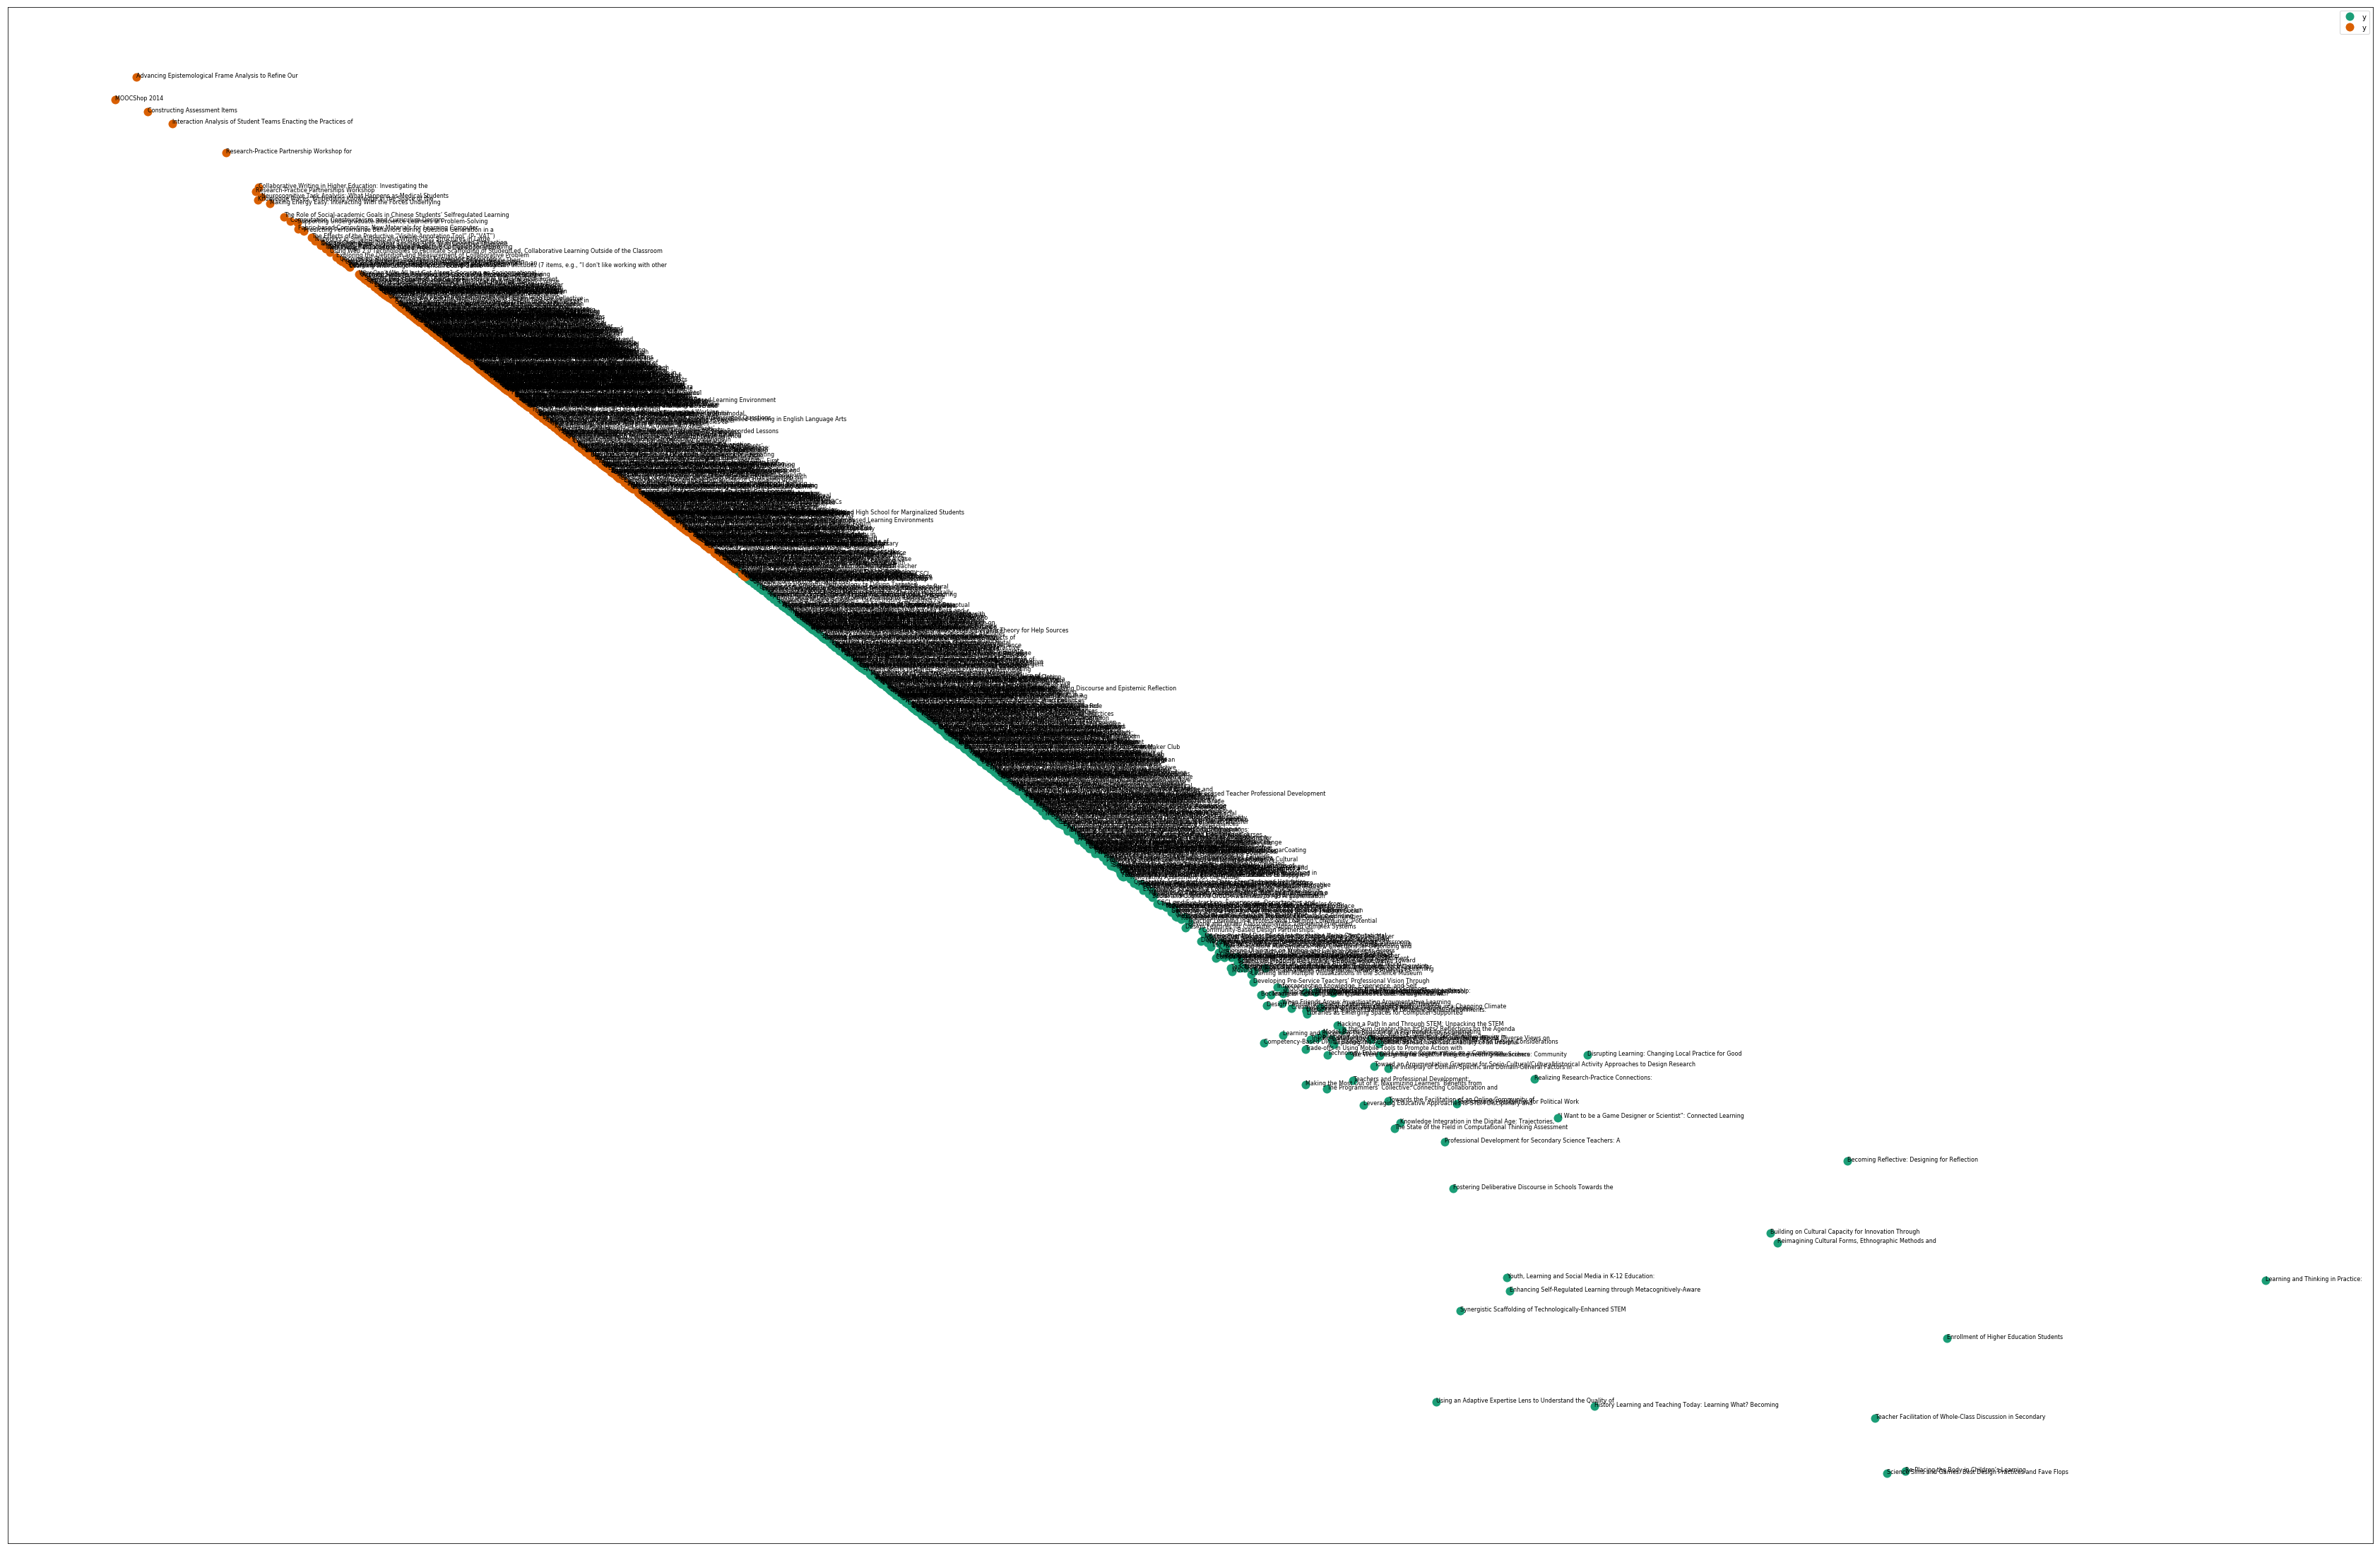

In [172]:
plot_cos_dist_clust(average_vector,clusters_glove)

For n_clusters = 2 The average silhouette_score is : 0.6365947552247627
For n_clusters = 3 The average silhouette_score is : 0.5725026608478186
For n_clusters = 5 The average silhouette_score is : 0.4740935059607335
For n_clusters = 7 The average silhouette_score is : 0.3977272104046227
For n_clusters = 10 The average silhouette_score is : 0.3463641209764603
For n_clusters = 20 The average silhouette_score is : 0.22348239040881845


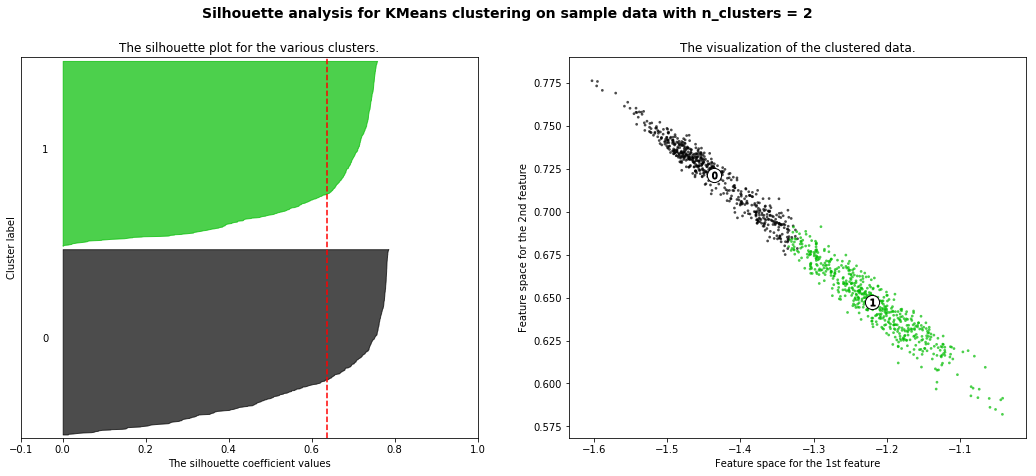

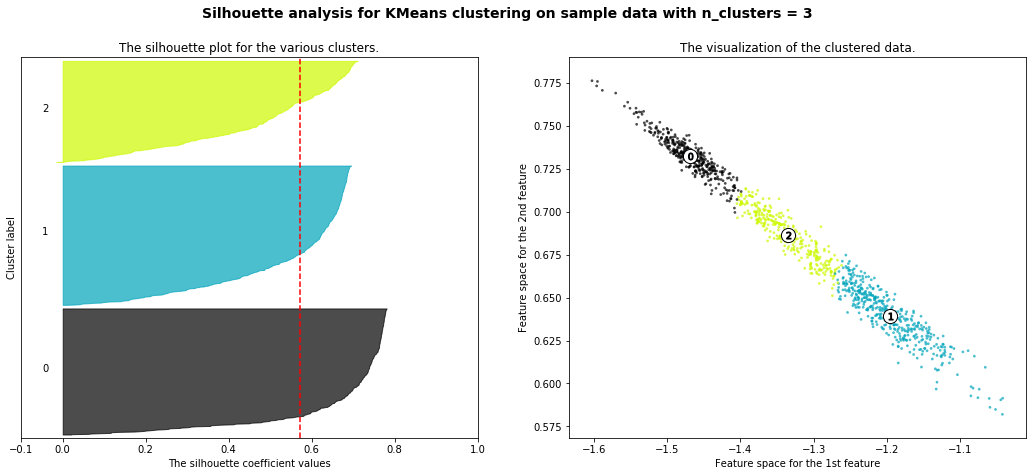

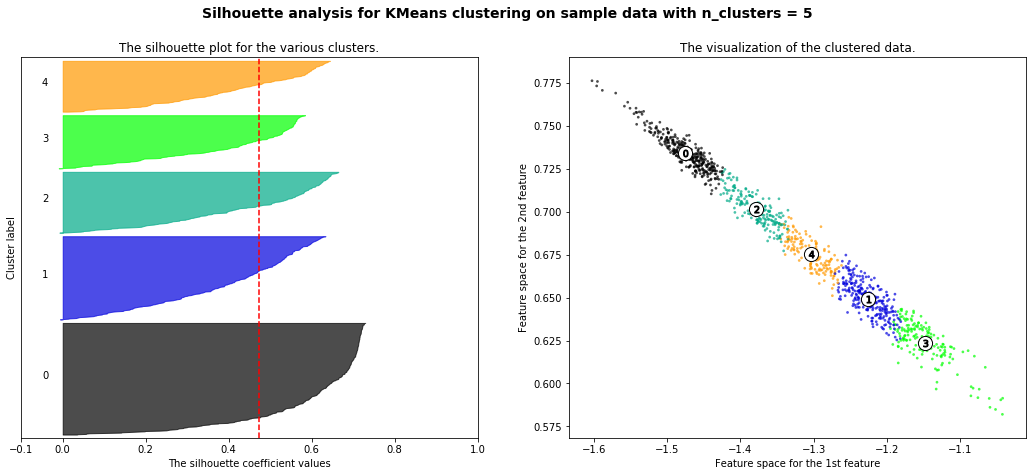

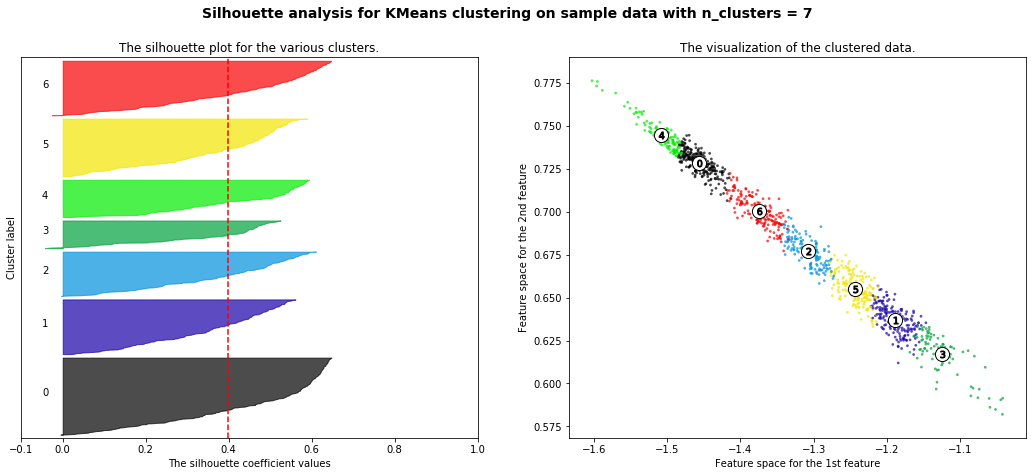

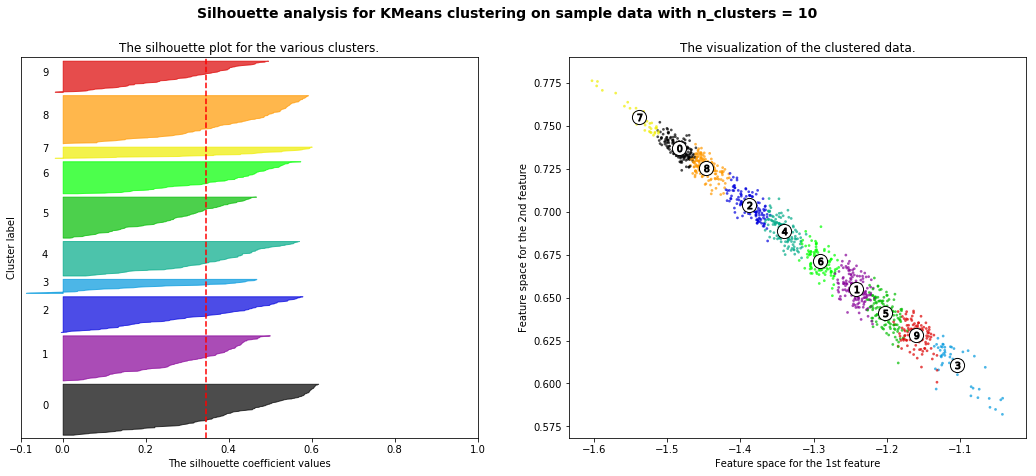

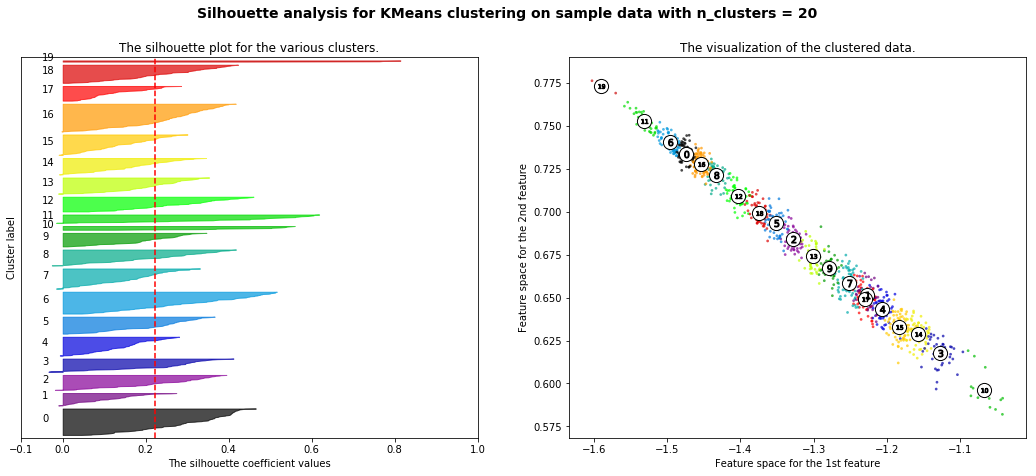

([0.6365947552247627,
  0.5725026608478186,
  0.4740935059607335,
  0.3977272104046227,
  0.3463641209764603,
  0.22348239040881845],
 [2, 3, 5, 7, 10, 20])

In [173]:
see_clusters(average_vector,clusters_glove,range_n_clusters)

### PCA to try to see the clustering on the two most important axis

In [174]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [175]:
sc = StandardScaler().fit(average_vector)
average_vector_standerdised = sc.transform(average_vector)


pca = PCA(.95)
pca.fit((average_vector_standerdised))
components = pca.transform((average_vector))
approximation = pca.inverse_transform(components)
print('PCA used %s components' %pca.n_components_)

PCA used 6 components


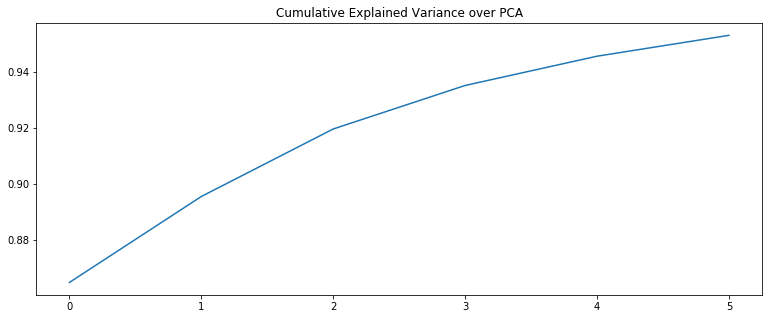

In [176]:
plt.figure(figsize=(13, 5));
plt.title('Cumulative Explained Variance over PCA');
plt.plot(pca.explained_variance_ratio_.cumsum());


In [177]:
pca = PCA(n_components=38)
pca.fit(average_vector)

PCA(copy=True, iterated_power='auto', n_components=38, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [178]:
components = pca.transform((average_vector))

In [179]:
num_clusters = 2
km_glove = KMeans(n_clusters=num_clusters)
%time km_glove.fit(components)
clusters_glove_pca = km_glove.labels_.tolist()

CPU times: user 230 ms, sys: 6.28 ms, total: 236 ms
Wall time: 39.7 ms


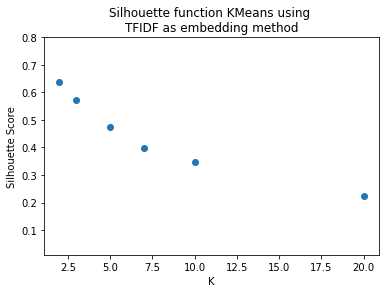

In [180]:

plt.scatter([2,3,5,7,10,20], silhouette)
plt.ylim(ymin= 0.01 ,ymax = 0.8)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette function KMeans using \nTFIDF as embedding method')
plt.savefig('sil_km_tfidf')

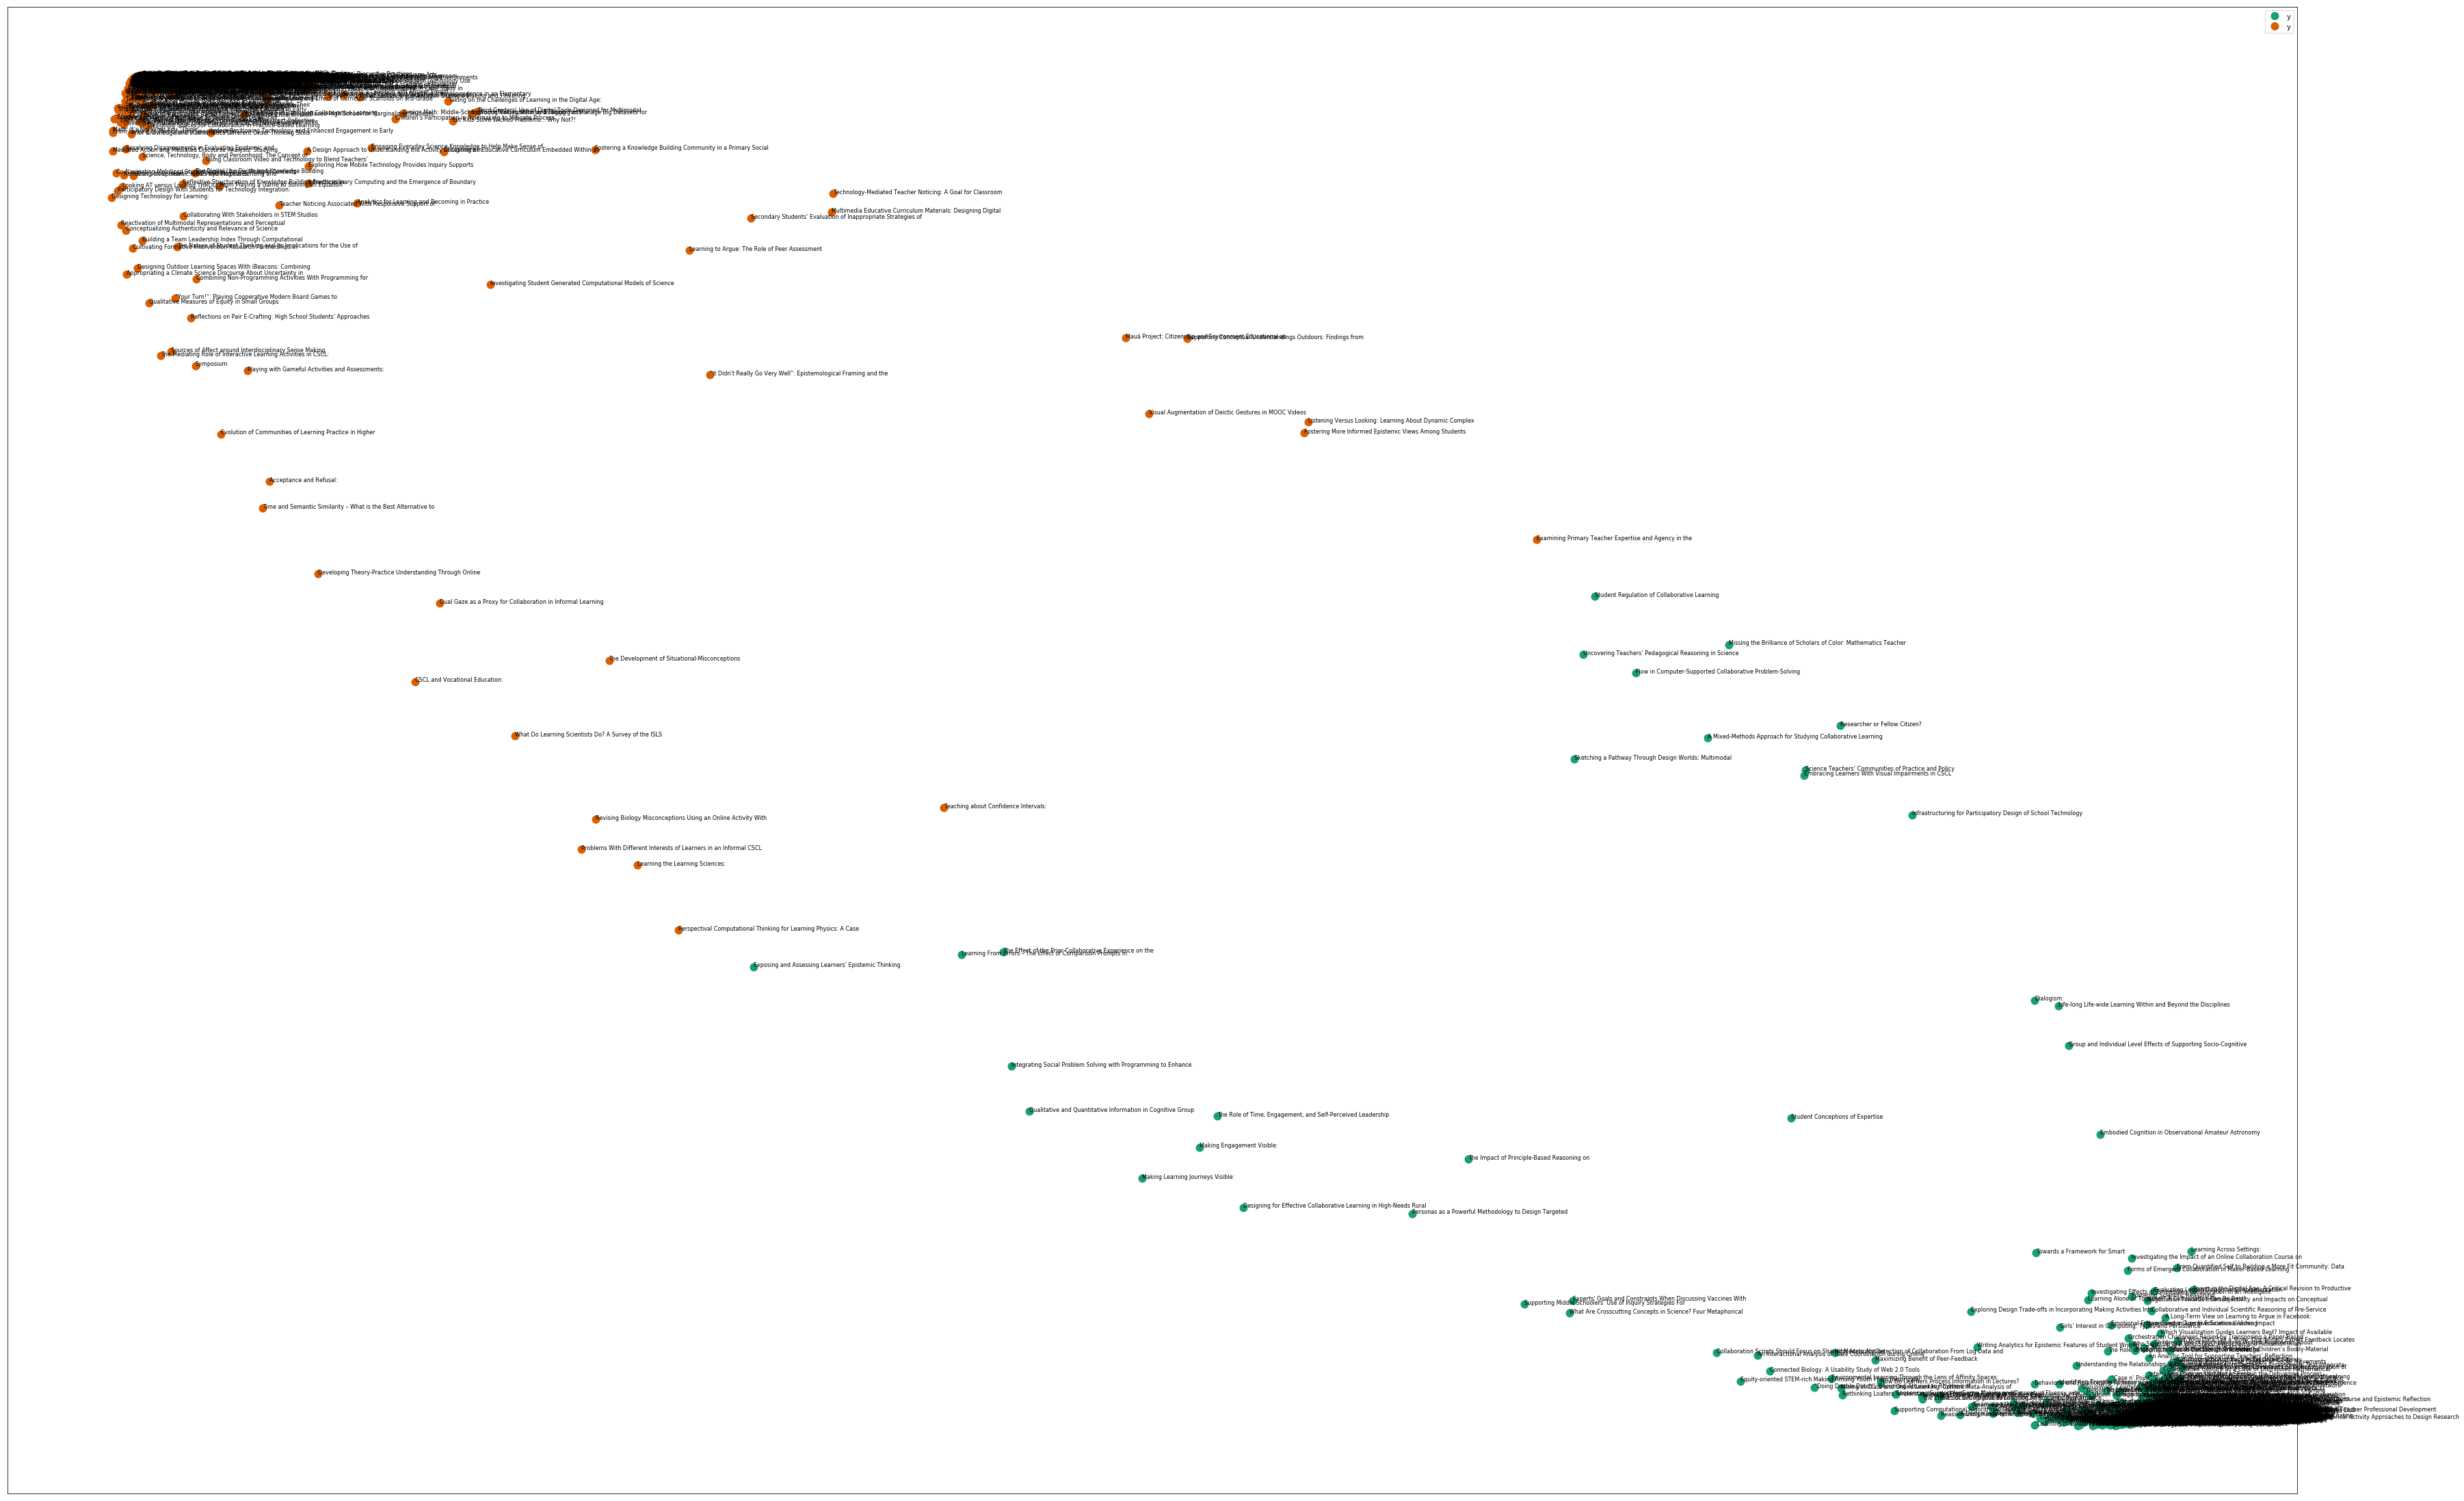

In [181]:
plot_cos_dist_clust(components,clusters_glove_pca)

For n_clusters = 2 The average silhouette_score is : 0.6380501964435332
For n_clusters = 3 The average silhouette_score is : 0.5753772543205916
For n_clusters = 5 The average silhouette_score is : 0.47917393779837175
For n_clusters = 7 The average silhouette_score is : 0.4046649727764779
For n_clusters = 10 The average silhouette_score is : 0.3685299104780753
For n_clusters = 20 The average silhouette_score is : 0.22586280965507732


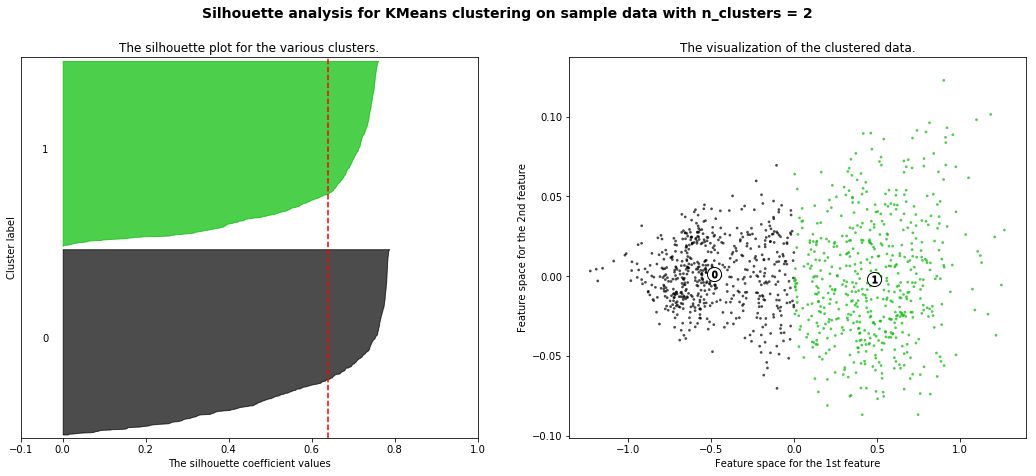

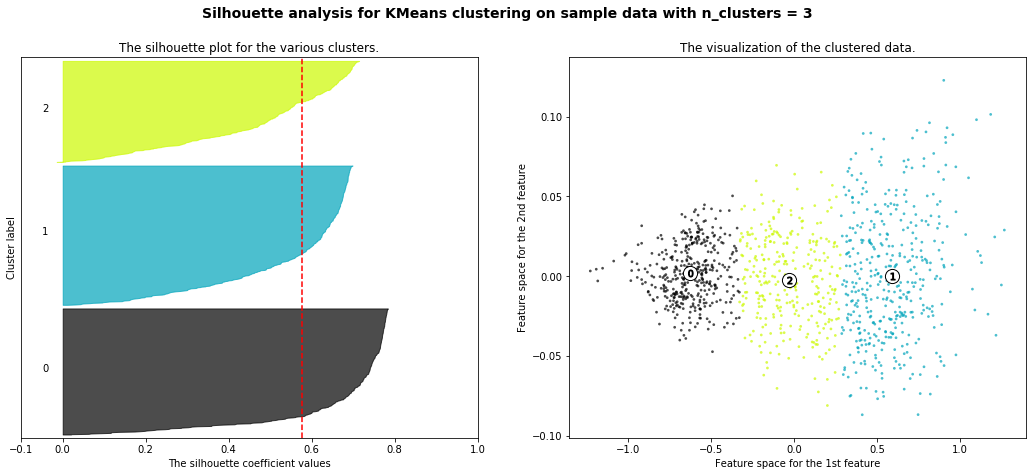

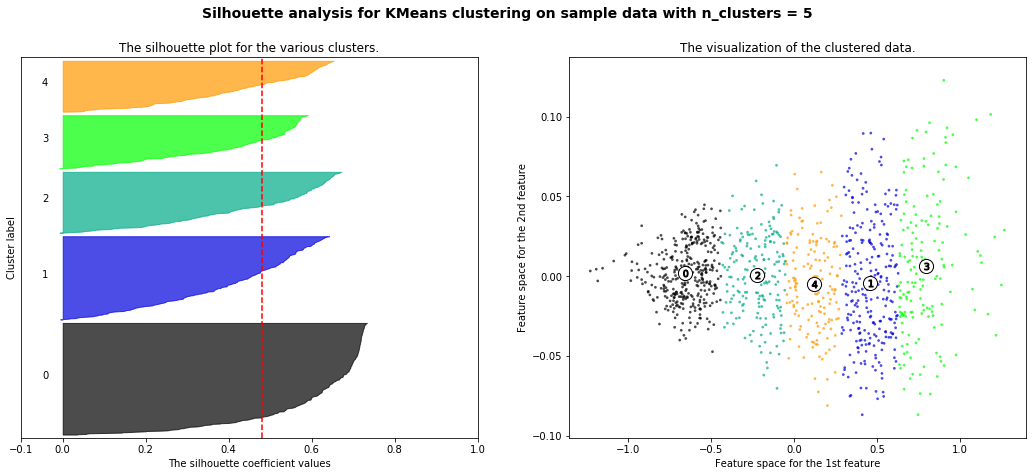

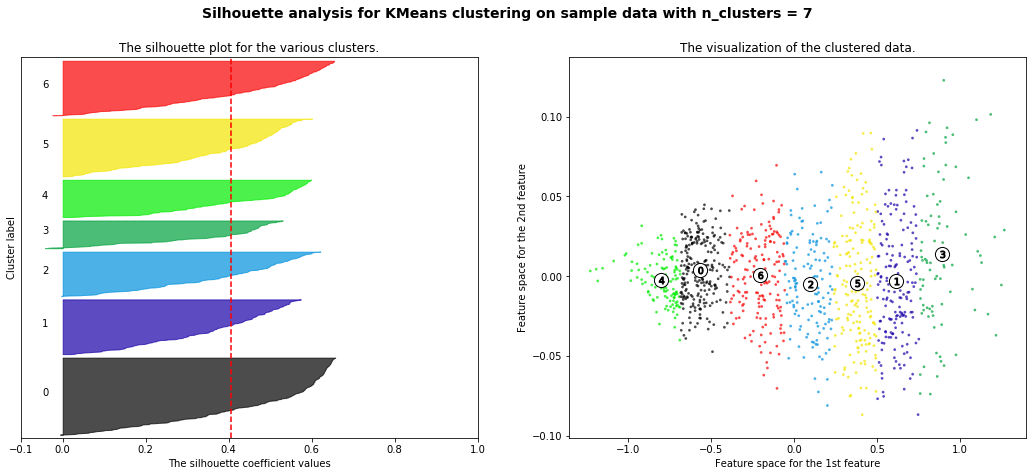

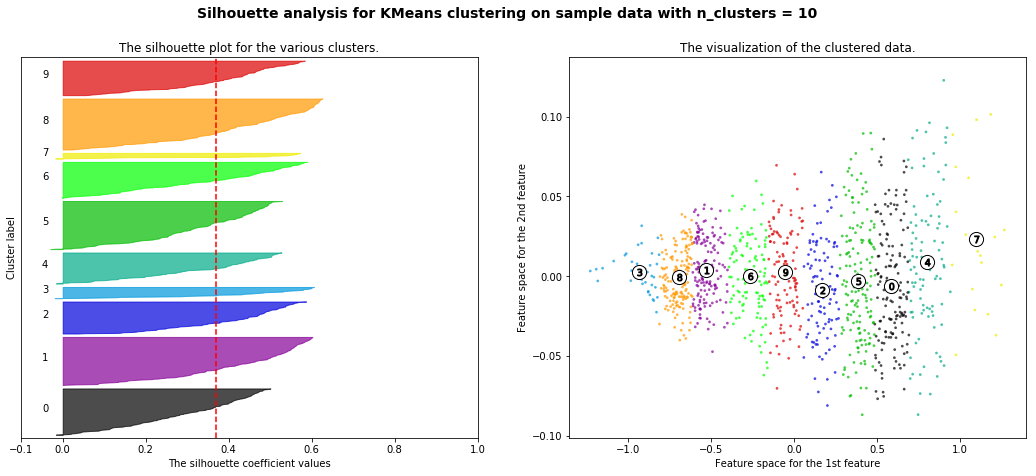

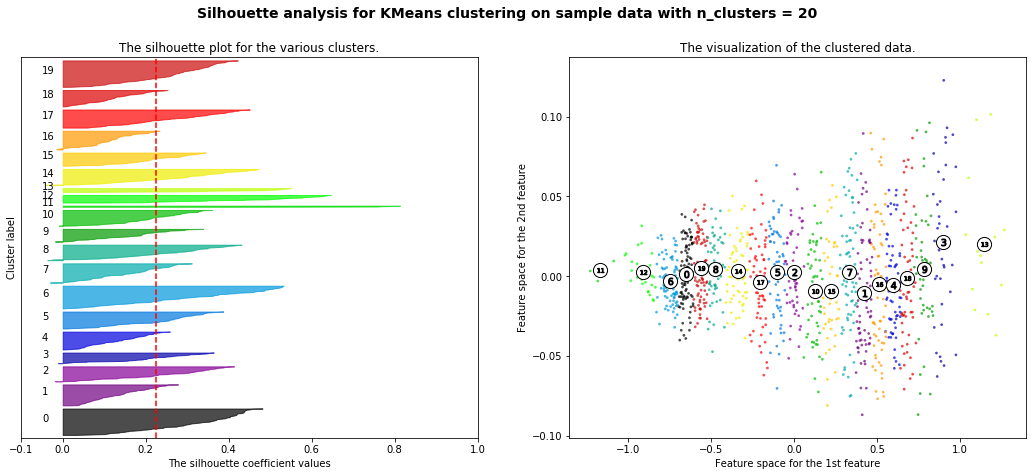

In [182]:
silhouette, range_n_clusters = see_clusters(components,clusters_glove_pca,range_n_clusters) 

In [183]:
# df_data.to_csv('data_key_words.csv')

In [184]:
df_data.head()

author iso  \
440-447                                      {Damşa, Crina}  en   
527-534    {Heffernan, Neil T., Murphy, Robert, Roschelle...  en   
1117-1121  {Price, Jeremy, Peck, Raphaela, Barber, Jacque...  en   
394-401                                      {Ben-Zvi, Dani}  en   
46-53                {Zangori, Laura, Schwarz, Christina V.}  en   

                                                 uri   issued  \
440-447     https://doi.dx.org/10.22318/icls2014.440  2014-06   
527-534     https://doi.dx.org/10.22318/icls2014.527  2014-06   
1117-1121  https://doi.dx.org/10.22318/icls2014.1117  2014-06   
394-401     https://doi.dx.org/10.22318/icls2014.394  2014-06   
46-53        https://doi.dx.org/10.22318/icls2014.46  2014-06   

                        accessioned          none  \
440-447   2018-05-21 22:08:50+00:00  Book chapter   
527-534   2018-05-21 22:08:51+00:00  Book chapter   
1117-1121 2018-05-21 22:08:51+00:00  Book chapter   
394-401   2018-05-21 22:08:50+00:00  Book chapter   
46-53     2018-05-21 22:08:50+00:00  Book chapter   

                                                    citation  \
440-447    Damşa, C. (2014). Shared Epistemic Agency and...   
527-534    Feng, M., Roschelle, J., Murphy, R., & Heffern...   
1117-1121  Loper, S., McNeill, K. L., Peck, R., Price, J....   
394-401    Mor-Hagani, S. & Ben-Zvi, D. (2014). Computer-...   
46-53      Forbes, C. T., Schwarz, C. V., & Zangori, L. (...   

                                                    abstract     NaN  \
440-447    This paper aims to clarify the concept of shar...  \n       
527-534    The field of learning analytics is rapidly dev...  \n       
1117-1121  We report on work in progress from a research ...  \n       
394-401    Various studies on computer-supported collabor...  \n       
46-53      Elementary students should engage in the artic...  \n       

                          available  year  
440-447   2018-05-21 22:08:50+00:00  2014  
527-534   2018-05-21 22:08:51+00:00  2014  
1117-1121 2018-05-21 22:08:51+00:00  2014  
394-401   2018-05-21 22:08:50+00:00  2014  
46-53     2018-05-21 22:08:50+00:00  2014